In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load & transformation dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
url = '/content/drive/MyDrive/inzeraty.csv'
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99572 entries, 0 to 99571
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               99572 non-null  int64  
 1   motor_objem      98970 non-null  float64
 2   motor_vykon      98910 non-null  float64
 3   prevodovka       51924 non-null  object 
 4   pohon            15601 non-null  object 
 5   spotreba         14300 non-null  float64
 6   vyrobeno_dt      98042 non-null  object 
 7   tachometr        99154 non-null  float64
 8   prvni_majitel    86847 non-null  float64
 9   servisni_knizka  86839 non-null  float64
 10  vin              39801 non-null  object 
 11  pocet_mist       97874 non-null  float64
 12  pocet_dveri      66663 non-null  float64
 13  nosnost          99530 non-null  float64
 14  barva            80908 non-null  object 
 15  karoserie        97512 non-null  object 
 16  nazev            99013 non-null  object 
 17  znacka      

In [6]:
url1 = '/content/drive/MyDrive/datova_kostka.csv'
df1=pd.read_csv(url1)

<ipython-input-6-34b4d681efa7>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(url1)


In [7]:
# check if there are the same vin to compare data fron two datasets
common_vins = pd.merge(df1[['vin']], df[['vin']], on='vin', how='inner')

if not common_vins.empty:
    print("Nalezeny shodné kódy VIN:")
    print(common_vins.nunique())
else:
    print("Nebyly nalezeny žádné odpovídající kódy VIN.")

Nalezeny shodné kódy VIN:
vin    176
dtype: int64


In [8]:
df= df.drop_duplicates()

In [9]:
threshold = 0.5
df= df.loc[:, df.isnull().mean() <= threshold]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99572 entries, 0 to 99571
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               99572 non-null  int64  
 1   motor_objem      98970 non-null  float64
 2   motor_vykon      98910 non-null  float64
 3   prevodovka       51924 non-null  object 
 4   vyrobeno_dt      98042 non-null  object 
 5   tachometr        99154 non-null  float64
 6   prvni_majitel    86847 non-null  float64
 7   servisni_knizka  86839 non-null  float64
 8   pocet_mist       97874 non-null  float64
 9   pocet_dveri      66663 non-null  float64
 10  nosnost          99530 non-null  float64
 11  barva            80908 non-null  object 
 12  karoserie        97512 non-null  object 
 13  nazev            99013 non-null  object 
 14  znacka           99013 non-null  object 
 15  palivo           82966 non-null  object 
 16  skupina          99570 non-null  object 
 17  stav        

In [10]:
# Filling missing values for categorical and numerical columns
for col in df.columns:
    if df[col].dtype == 'object':  # Категоріальні дані
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:  # Числові дані
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)


<ipython-input-10-76a86aa07149>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(mean_value)
<ipython-input-10-76a86aa07149>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(mode_value)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99572 entries, 0 to 99571
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               99572 non-null  int64  
 1   motor_objem      99572 non-null  float64
 2   motor_vykon      99572 non-null  float64
 3   prevodovka       99572 non-null  object 
 4   vyrobeno_dt      99572 non-null  object 
 5   tachometr        99572 non-null  float64
 6   prvni_majitel    99572 non-null  float64
 7   servisni_knizka  99572 non-null  float64
 8   pocet_mist       99572 non-null  float64
 9   pocet_dveri      99572 non-null  float64
 10  nosnost          99572 non-null  float64
 11  barva            99572 non-null  object 
 12  karoserie        99572 non-null  object 
 13  nazev            99572 non-null  object 
 14  znacka           99572 non-null  object 
 15  palivo           99572 non-null  object 
 16  skupina          99572 non-null  object 
 17  stav        

In [12]:
df.columns

Index(['id', 'motor_objem', 'motor_vykon', 'prevodovka', 'vyrobeno_dt',
       'tachometr', 'prvni_majitel', 'servisni_knizka', 'pocet_mist',
       'pocet_dveri', 'nosnost', 'barva', 'karoserie', 'nazev', 'znacka',
       'palivo', 'skupina', 'stav', 'list_cena_dph'],
      dtype='object')

In [13]:
# Setting DateTime format
df['vyrobeno_dt'] = pd.to_datetime(df['vyrobeno_dt'], errors='coerce')

# Check min and max data
min_date = df['vyrobeno_dt'].min()
max_date = df['vyrobeno_dt'].max()

print(f"Minimum data {min_date}")
print(f"Maximum data: {max_date}")


Minimum data 1929-01-01 00:00:00
Maximum data: 2030-01-01 00:00:00


In [14]:
df = df.sort_values(by=['vyrobeno_dt'], ascending=False).reset_index(drop=True)

In [15]:
df['rok_vyroby'] = df['vyrobeno_dt'].dt.year

print(df['rok_vyroby'].unique())

[2030. 2027. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017. 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1994. 1993. 1992.
 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984. 1983. 1982. 1981. 1980.
 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1969. 1968.
 1967. 1966. 1965. 1963. 1962. 1960. 1959. 1958. 1956. 1952. 1951. 1950.
 1941. 1929.   nan]


In [16]:
df.columns

Index(['id', 'motor_objem', 'motor_vykon', 'prevodovka', 'vyrobeno_dt',
       'tachometr', 'prvni_majitel', 'servisni_knizka', 'pocet_mist',
       'pocet_dveri', 'nosnost', 'barva', 'karoserie', 'nazev', 'znacka',
       'palivo', 'skupina', 'stav', 'list_cena_dph', 'rok_vyroby'],
      dtype='object')

#Výpočet a výstup požadovaných výsledků za poslední 15 let

In [17]:
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2024-11-19')

# Filtration by the period
inzeraty = df[(df['vyrobeno_dt'] >= start_date) & (df['vyrobeno_dt'] <= end_date)]

# Sort by dates
inzeraty = inzeraty.sort_values(by=['vyrobeno_dt'], ascending=False)

inzeraty.head()

id  motor_objem  motor_vykon prevodovka vyrobeno_dt  tachometr  \
9   1004070       1469.0         96.0   manualni  2024-11-01        5.0   
13   959930        998.0         46.0   manualni  2024-11-01        1.0   
14   912450       1197.0         58.0   manualni  2024-11-01        1.0   
10   853260       1199.0         74.0   manualni  2024-11-01        5.0   
12  1011330       1598.0        118.0   manualni  2024-11-01        1.0   

    prvni_majitel  servisni_knizka  pocet_mist  pocet_dveri  nosnost  \
9             0.0              1.0         5.0          5.0      0.0   
13            0.0              1.0         5.0          5.0      0.0   
14            0.0              1.0         5.0          5.0      0.0   
10            0.0              1.0         5.0          5.0      0.0   
12            0.0              1.0         5.0          5.0      0.0   

               barva  karoserie     nazev znacka  palivo skupina  \
9              černá        SUV   Compass   Jeep  benzin  Osobní   
13              bílá  hatchback   Picanto    Kia  benzin  Osobní   
14  červená metalíza        SUV    Stonic    Kia  benzin  Osobní   
10              bílá        SUV   Avenger   Jeep  benzin  Osobní   
12     šedá metalíza        SUV  Sportage    Kia  benzin  Osobní   

            stav  list_cena_dph  rok_vyroby  
9   nové vozidlo         799000      2024.0  
13  nové vozidlo         354980      2024.0  
14  nové vozidlo         427980      2024.0  
10  nové vozidlo         534900      2024.0  
12  nové vozidlo         820980      2024.0

In [18]:
def year_group(year):
    if pd.isna(year):
        return np.nan
    current_year = 2024
    age = current_year - year

    if age <= 3:
        return '2022-2024'
    elif 3 < age <= 6:
        return '2019-2021'
    elif 6 < age <= 9:
        return '2016-2018'
    elif 9 < age <= 12:
        return '2013-2015'
    else:
        return '2010-2012'

inzeraty['vyroba_rok_skupina'] = inzeraty['rok_vyroby'].apply(year_group)

print(inzeraty['vyroba_rok_skupina'].unique())

['2022-2024' '2019-2021' '2016-2018' '2013-2015' '2010-2012']


In [19]:
# Seskupení podle tachometra
grouped_tachometr = inzeraty.groupby(['znacka', 'nazev','skupina']).agg(avg_tachometr=('tachometr', 'mean')).reset_index()
grouped_tachometr = grouped_tachometr.sort_values(by='avg_tachometr', ascending=False)
grouped_tachometr_cleaned=grouped_tachometr.dropna()
top_10_max_tachometr= grouped_tachometr_cleaned.head(10).round()

print (f'Top 10 znacek s maximalným tachometrem: \n{top_10_max_tachometr}')


Top 10 znacek s maximalným tachometrem: 
       znacka    nazev   skupina  avg_tachometr
917      Stas     Stas  Užitkové       972358.0
72       Avia     Avia  Užitkové       876000.0
214       DAF  Ostatní  Užitkové       674000.0
1103    Škoda  Octavia  Autobusy       660776.0
884    Scania   Scania  Nákladní       600808.0
573       MAN  Ostatní  Užitkové       526000.0
779   Ostatní  Ostatní  Nákladní       522148.0
500     Kögel    Kögel   Přívěsy       518871.0
1079    Volvo    Volvo  Nákladní       495765.0
856   Renault  Mascott  Užitkové       484025.0


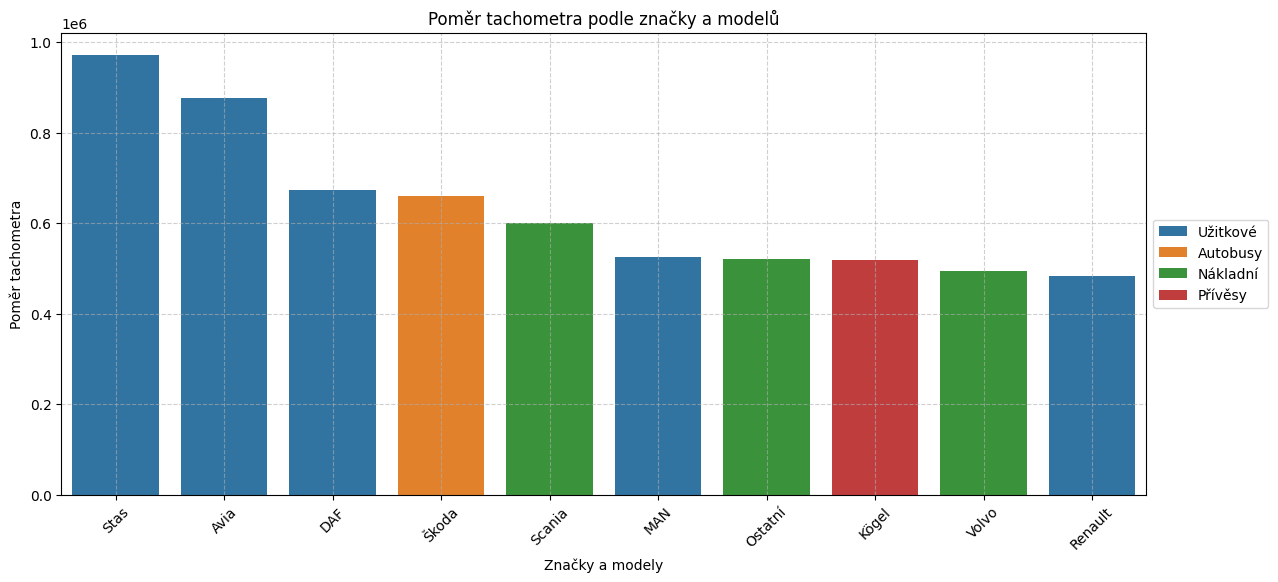

In [20]:
# Graf: Poměr tachometra podle značky a modelů
plt.figure(figsize=(14, 6))
sns.barplot(
    x='znacka',
    y='avg_tachometr',
    hue= 'skupina',
    data=grouped_tachometr_cleaned.head(10),
    palette='tab10',
    errorbar=None
)

plt.title("Poměr tachometra podle značky a modelů")
plt.xlabel("Značky a modely")
plt.ylabel("Poměr tachometra")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Poměr tachometra podle značky a skupiny.png', bbox_inches='tight', dpi=300)
plt.show()

In [21]:
# Seskupení podle vykonu motora
grouped_engine_power = inzeraty.groupby(['znacka', 'skupina']).agg(avg_motor_vykon=('motor_vykon', 'mean')).reset_index()
grouped_engine_power = grouped_engine_power.sort_values(by='avg_motor_vykon', ascending=False)
top_10_max_engine_power= grouped_engine_power.head(10).round()
print (f'Top 10 značek s maximalným vykonem motora: \n{top_10_max_engine_power}','\n')

Top 10 značek s maximalným vykonem motora: 
           znacka   skupina  avg_motor_vykon
61        Ferrari    Osobní            525.0
119   Lamborghini    Osobní            496.0
144       McLaren    Osobní            486.0
201   Rolls-Royce    Osobní            442.0
11   Aston Martin    Osobní            416.0
22        Bentley    Osobní            400.0
263         Škoda    Osobní            347.0
195       Renault  Nákladní            345.0
206        Scania  Nákladní            341.0
247         Volvo  Užitkové            337.0 



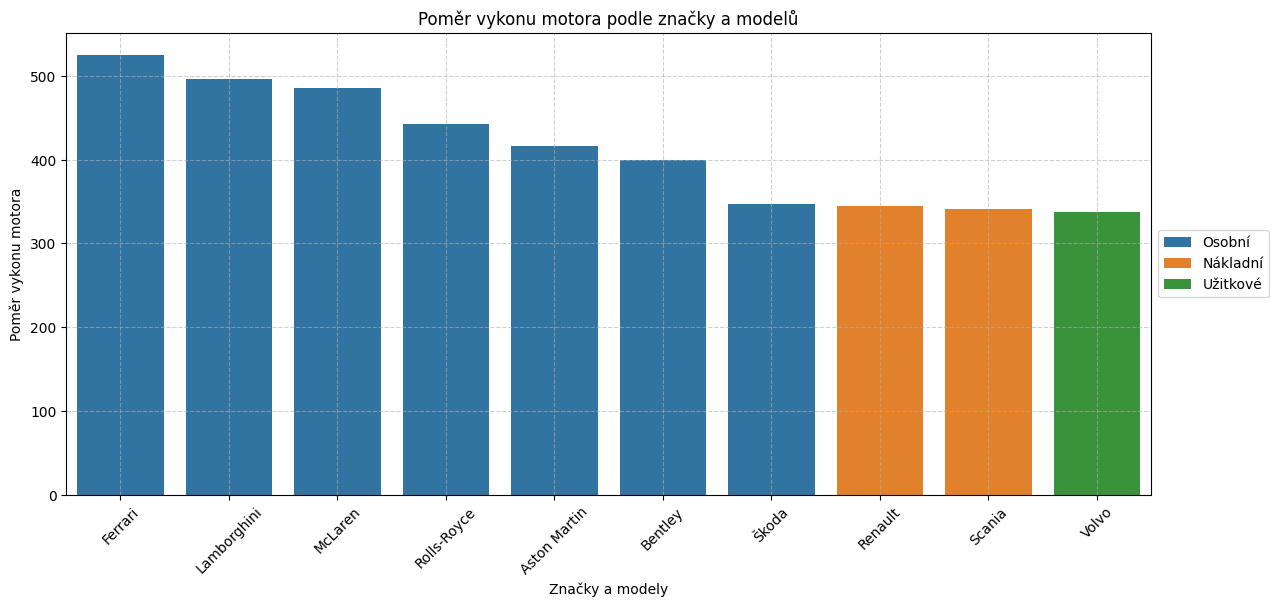

In [22]:
# Graf: Poměr vykonu motora podle značky a modelů
plt.figure(figsize=(14, 6))
sns.barplot(
    x='znacka',
    y='avg_motor_vykon',
    hue= 'skupina',
    data=top_10_max_engine_power,
    palette='tab10',
    errorbar=None
)

plt.title("Poměr vykonu motora podle značky a modelů")
plt.xlabel("Značky a modely")
plt.ylabel("Poměr vykonu motora")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Poměr vykonu motora podle značky a skupiny.png', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
grouped_prevodovka = inzeraty.groupby(['prevodovka']).size().reset_index(name='count')
grouped_prevodovka = grouped_prevodovka.sort_values(by='count', ascending=False)
print(grouped_prevodovka)

    prevodovka  count
1     manualni  61221
0  automaticka  11226


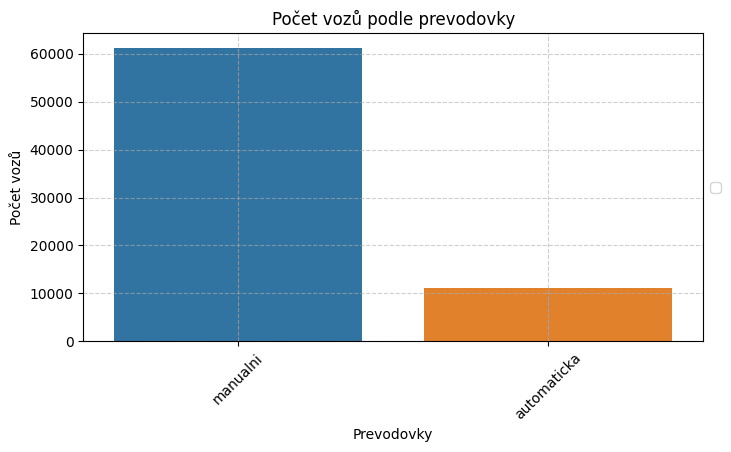

In [24]:
# Graf: Poměr vykonu motora podle značky a modelů
plt.figure(figsize=(8, 4))
sns.barplot(
    x='prevodovka',
    y='count',
    hue= 'prevodovka',
    data=grouped_prevodovka,
    palette='tab10',
    errorbar=None
)

plt.title("Počet vozů podle prevodovky")
plt.xlabel("Prevodovky")
plt.ylabel("Počet vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Počet vozů podle prevodovky.png', bbox_inches='tight', dpi=300)
plt.show()

In [25]:
grouped_karoserie = inzeraty.groupby(['karoserie']).size().reset_index(name='count')
grouped_karoserie = grouped_karoserie.sort_values(by='count', ascending=False)
print(grouped_karoserie)

              karoserie  count
17                kombi  21693
2                   SUV  16052
13            hatchback  14268
1                   MPV   4935
47                sedan   3972
..                  ...    ...
40    pro přepravu lodí      2
6              buldozer      1
60  vysokozdvižný vozík      1
39    pro přepravu koní      1
21            malé moto      1

[65 rows x 2 columns]


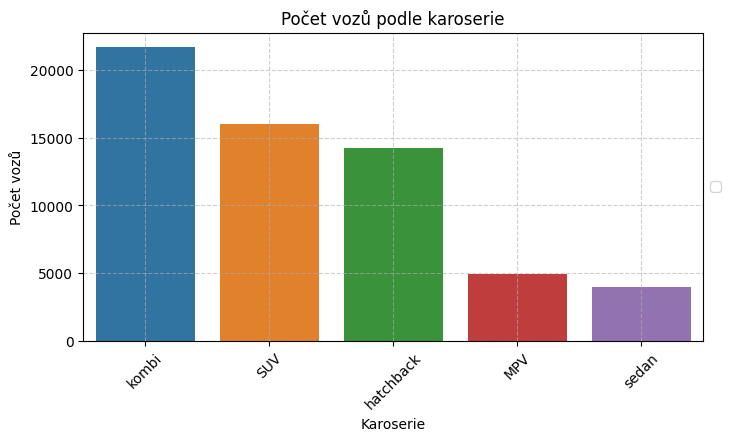

In [26]:
# Graf: Poměr vykonu motora podle značky a modelů
plt.figure(figsize=(8, 4))
sns.barplot(
    x='karoserie',
    y='count',
    hue= 'karoserie',
    data=grouped_karoserie.head(),
    palette='tab10',
    errorbar=None
)

plt.title("Počet vozů podle karoserie")
plt.xlabel("Karoserie")
plt.ylabel("Počet vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Počet vozů podle karoserie.png', bbox_inches='tight', dpi=300)
plt.show()

In [41]:
grouped_stav = inzeraty.groupby(['stav']).size().reset_index(name='count')
grouped_stav = grouped_stav.sort_values(by='count', ascending=False)
print(grouped_stav)

                   stav  count
0                 dobrý  41809
12          velmi dobrý  13839
6             perfektní  13656
4          nové vozidlo   2458
9    předváděcí vozidlo    306
1            havarované    147
8             poškozené     70
11           uspokojivý     63
7               použitý     49
13  způsobilý k provozu     18
5                  nový     12
2      na náhradní díly     11
3            nepojízdné      8
10           repasovaný      1


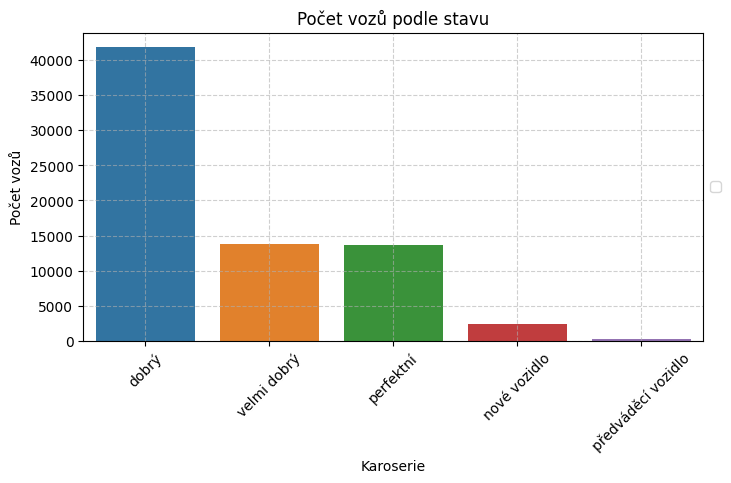

In [45]:
# Graf: Počet vozů podle stavu
plt.figure(figsize=(8, 4))
sns.barplot(
    x='stav',
    y='count',
    hue= 'stav',
    data=grouped_stav.head(),
    palette='tab10',
    errorbar=None
)

plt.title("Počet vozů podle stavu")
plt.xlabel("Karoserie")
plt.ylabel("Počet vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Počet vozů podle stavu.png', bbox_inches='tight', dpi=300)
plt.show()

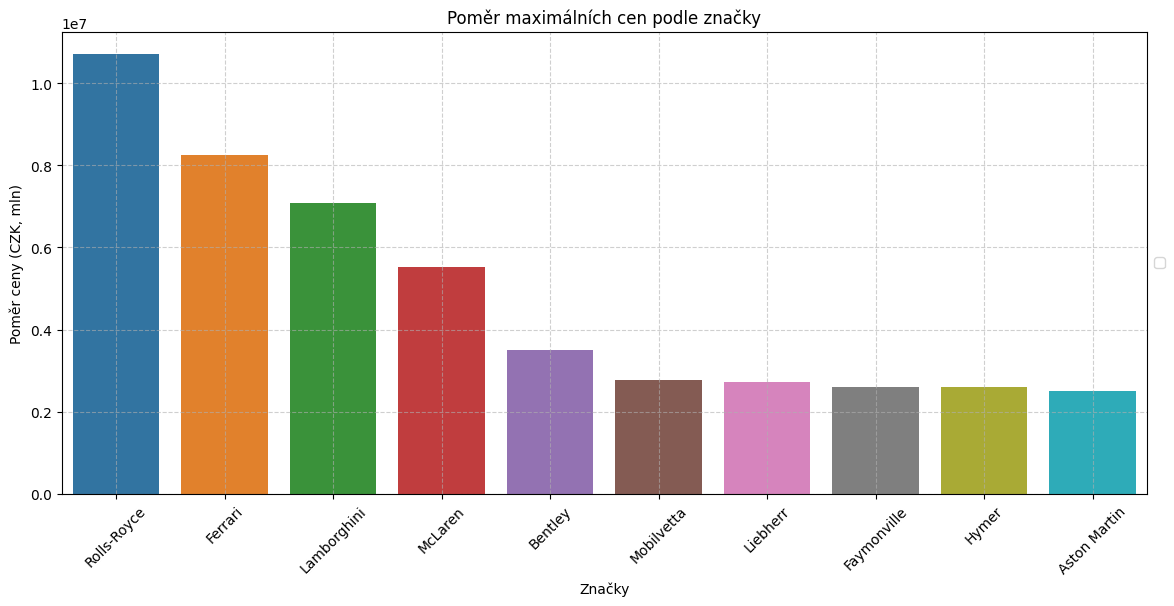

In [27]:
# Graf: Poměr ceny vozu podle značky a modelu

count_data = inzeraty.groupby(['znacka']).agg(avg_cena=('list_cena_dph', 'mean')).reset_index()
count_data_sorted = count_data.sort_values(by='avg_cena', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x='znacka',
    y='avg_cena',
    hue = 'znacka',
    data=count_data_sorted.head(10),
    palette='tab10',
    errorbar=None
)

plt.title("Poměr maximálních cen podle značky")
plt.xlabel("Značky")
plt.ylabel("Poměr ceny (CZK, mln)")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Poměr maximálních cen podle značky.png', bbox_inches='tight', dpi=300)
plt.show()

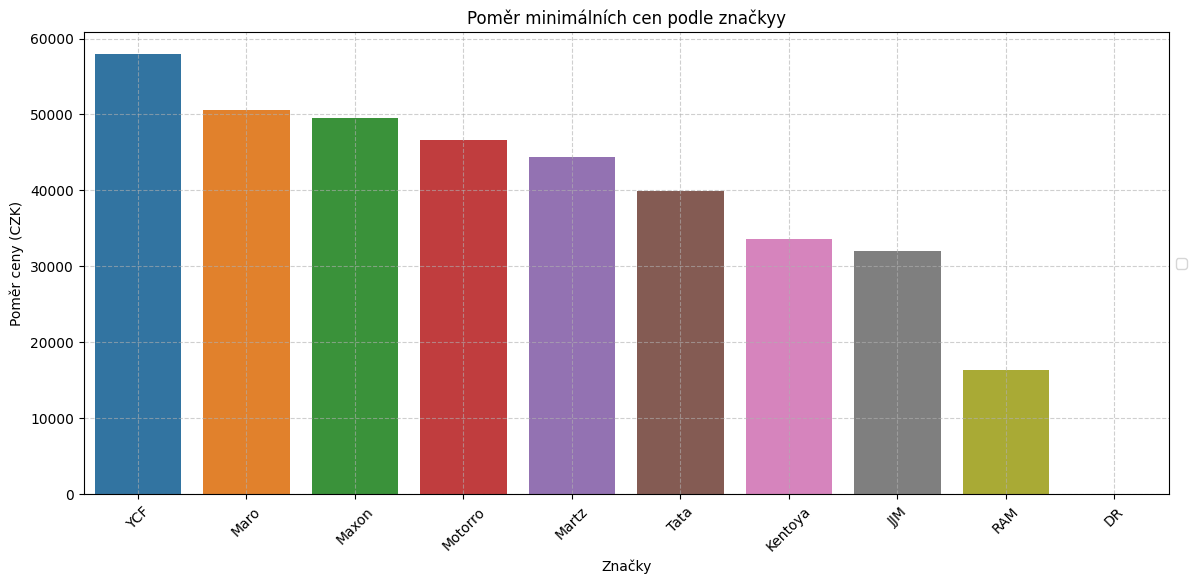

In [28]:
# Graf: Poměr ceny vozu podle značky a modelu

count_data = inzeraty.groupby(['znacka']).agg(avg_cena=('list_cena_dph', 'mean')).reset_index()
count_data_sorted = count_data.sort_values(by='avg_cena', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x='znacka',
    y='avg_cena',
    hue = 'znacka',
    data=count_data_sorted.tail(10),
    palette='tab10',
    errorbar=None
)

plt.title("Poměr minimálních cen podle značkyy")
plt.xlabel("Značky")
plt.ylabel("Poměr ceny (CZK)")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Poměr minimálních cen podle značky.png', bbox_inches='tight', dpi=300)
plt.show()

<ipython-input-29-ce8c3c2bac2c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


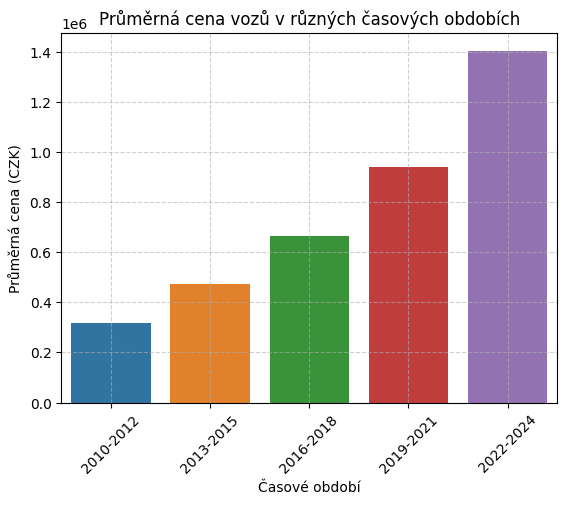

In [29]:
# Graf: Prumerna_cena_automobilu 15
period_order = ['2010-2012', '2013-2015', '2016-2018', '2019-2021', '2022-2024']
count_15_data = inzeraty.groupby(['vyroba_rok_skupina', 'nazev', 'skupina', 'znacka']).agg(
    avg_cena=('list_cena_dph', 'mean')
).reset_index()

sns.barplot(
    x='vyroba_rok_skupina',
    y='avg_cena',
    data=count_15_data,
    palette='tab10',
    errorbar=None,
    order=period_order
)

plt.title("Průměrná cena vozů v různých časových obdobích")
plt.xlabel("Časové období")
plt.ylabel("Průměrná cena (CZK)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Prumerna_cena_vozů_15.png', bbox_inches='tight', dpi=300)
plt.show()

In [30]:
# Top 20 auto brands registered within 2010 to 2024
brands= ['ŠKODA',
 'VW',
 'FORD',
 'HYUNDAI',
 'MERCEDES',
 'PEUGEOT',
 'RENAULT',
 'BMW',
 'CITROËN',
 'AGADOS',
 'OPEL',
 'TOYOTA',
 'DACIA',
 'KIA',
 'AUDI',
 'FIAT',
 'HONDA',
 'SEAT',
 'SUZUKI',
 'VOLVO'
]

Výsledky pro značku ŠKODA:
  vyroba_rok_skupina znacka    nazev   skupina       avg_cena
0          2010-2012  Škoda   Citigo    Osobní  107116.666667
1          2010-2012  Škoda    Fabia    Osobní  109060.998246
2          2010-2012  Škoda  Octavia   Motorky   48633.333333
3          2010-2012  Škoda  Octavia  Nákladní  448139.000000
4          2010-2012  Škoda  Octavia    Obytné  291333.333333 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku ŠKODA uložen jako Poměr_ceny_podle_značky_ŠKODA_a_modelů_15.png



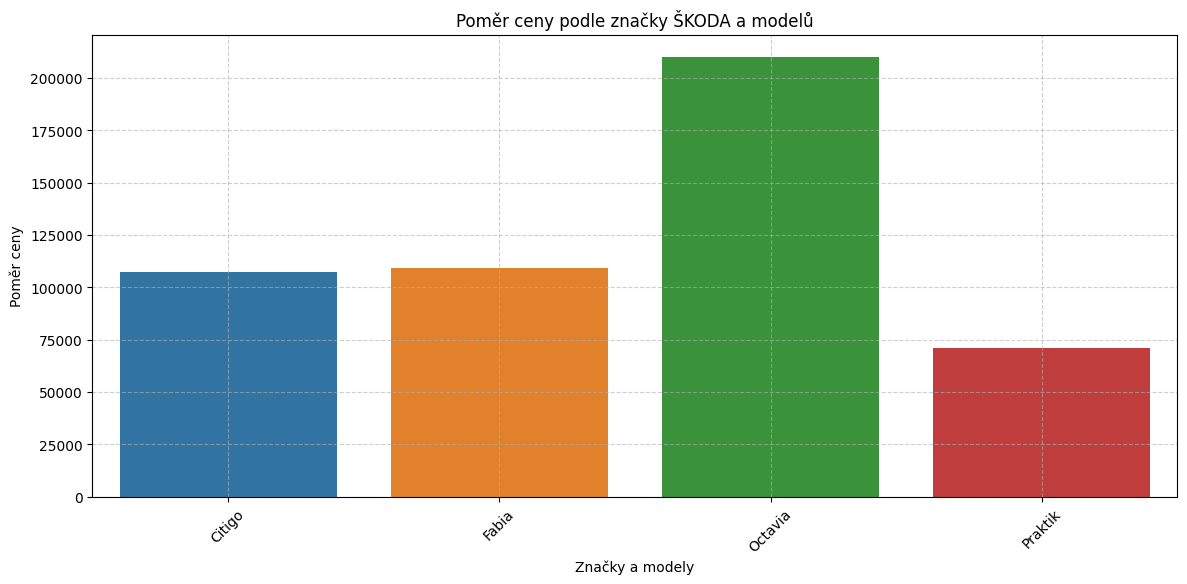

Žádná data pro značku VW.
Výsledky pro značku FORD:
  vyroba_rok_skupina znacka   nazev skupina       avg_cena
0          2010-2012   Ford   C-MAX  Osobní  138993.934426
1          2010-2012   Ford  Fiesta  Osobní  117787.324324
2          2010-2012   Ford   Focus  Osobní  115397.116000
3          2010-2012   Ford  Fusion  Osobní  101800.307692
4          2010-2012   Ford  Galaxy  Osobní  191930.170732 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku FORD uložen jako Poměr_ceny_podle_značky_FORD_a_modelů_15.png



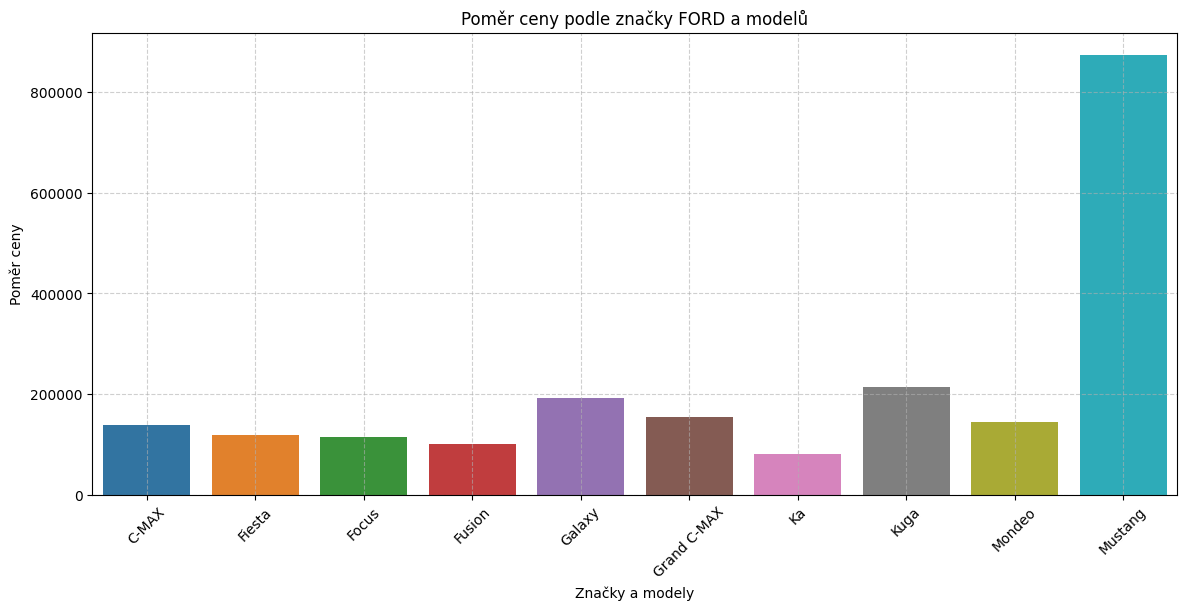

Výsledky pro značku HYUNDAI:
  vyroba_rok_skupina   znacka    nazev   skupina       avg_cena
0          2010-2012  Hyundai   Accent    Osobní   67250.000000
1          2010-2012  Hyundai  Elantra    Osobní  148714.285714
2          2010-2012  Hyundai  Genesis    Osobní  398090.000000
3          2010-2012  Hyundai      H 1    Osobní  183968.428571
4          2010-2012  Hyundai      H 1  Užitkové  169643.857143 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku HYUNDAI uložen jako Poměr_ceny_podle_značky_HYUNDAI_a_modelů_15.png



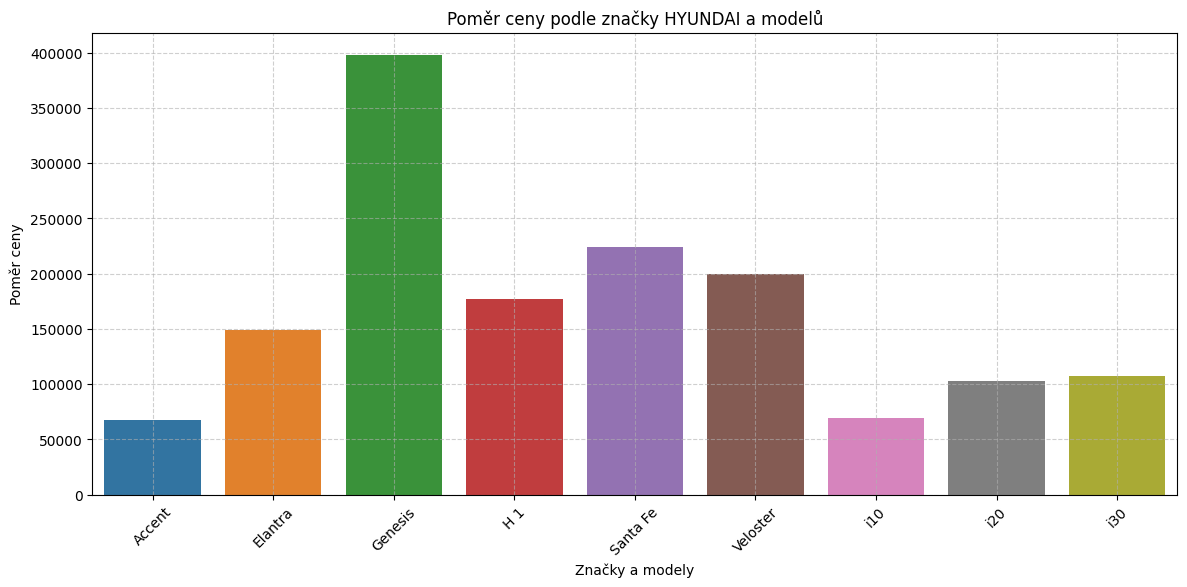

Žádná data pro značku MERCEDES.
Výsledky pro značku PEUGEOT:
  vyroba_rok_skupina   znacka nazev skupina       avg_cena
0          2010-2012  Peugeot   107  Osobní   68250.000000
1          2010-2012  Peugeot   206  Osobní   74877.222222
2          2010-2012  Peugeot   207  Osobní   90379.483871
3          2010-2012  Peugeot  3008  Osobní  146779.431818
4          2010-2012  Peugeot   307  Osobní   67000.000000 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku PEUGEOT uložen jako Poměr_ceny_podle_značky_PEUGEOT_a_modelů_15.png



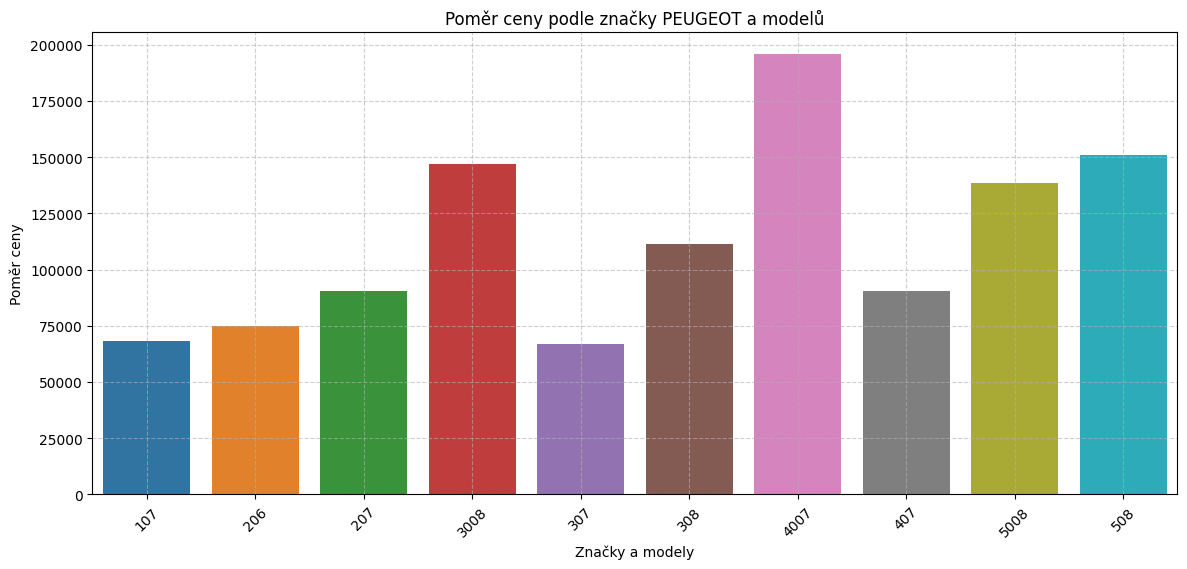

Výsledky pro značku RENAULT:
  vyroba_rok_skupina   znacka         nazev skupina       avg_cena
0          2010-2012  Renault          Clio  Osobní   83065.360000
1          2010-2012  Renault        Espace  Osobní  159240.000000
2          2010-2012  Renault       Fluence  Osobní  106657.416667
3          2010-2012  Renault  Grand Scénic  Osobní  130160.852941
4          2010-2012  Renault        Kangoo  Osobní  115039.769231 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku RENAULT uložen jako Poměr_ceny_podle_značky_RENAULT_a_modelů_15.png



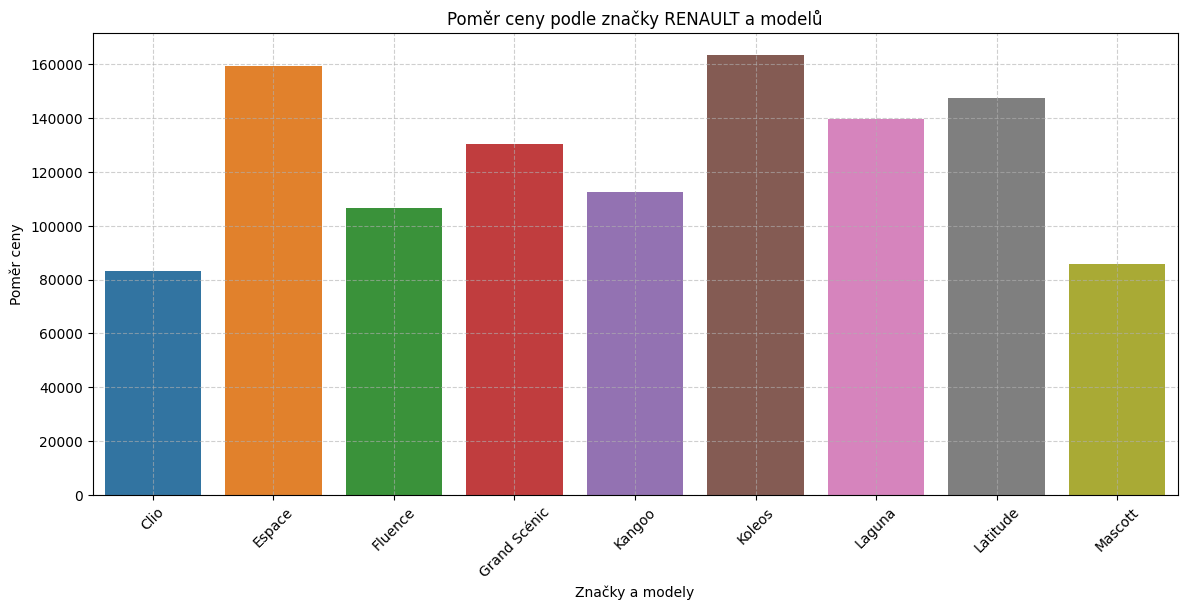

Výsledky pro značku BMW:
  vyroba_rok_skupina znacka nazev skupina      avg_cena
0          2010-2012    BMW    M3  Osobní  1.500000e+06
1          2010-2012    BMW    X1  Osobní  2.426588e+05
2          2010-2012    BMW    X3  Osobní  3.054439e+05
3          2010-2012    BMW    X5  Osobní  3.768603e+05
4          2010-2012    BMW    X6  Osobní  4.258418e+05 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku BMW uložen jako Poměr_ceny_podle_značky_BMW_a_modelů_15.png



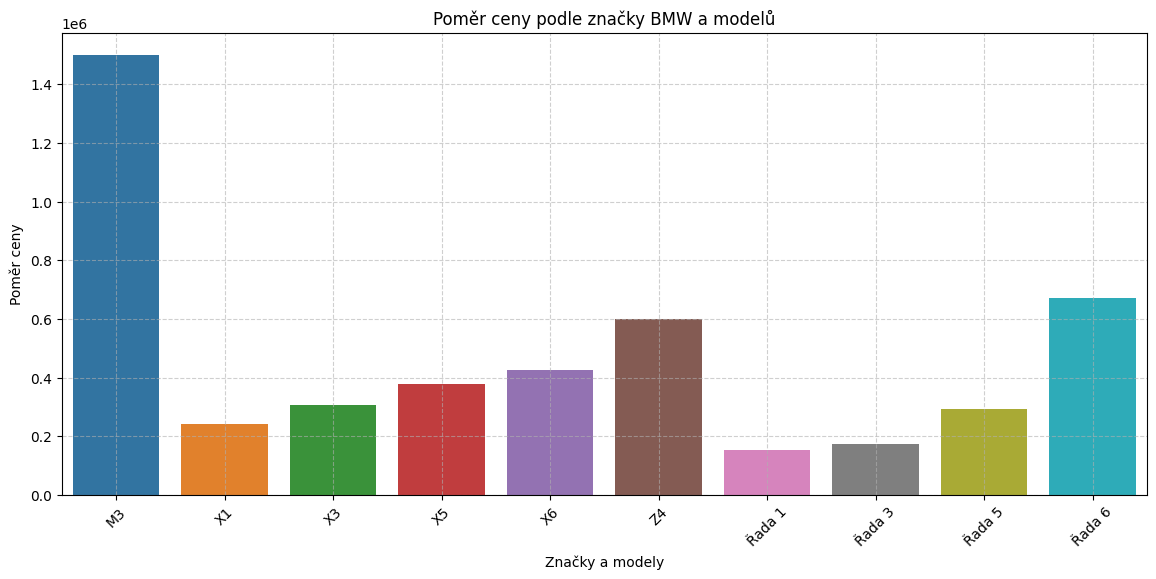

Výsledky pro značku CITROËN:
  vyroba_rok_skupina   znacka      nazev   skupina       avg_cena
0          2010-2012  Citroën   Berlingo    Osobní  141039.851852
1          2010-2012  Citroën   Berlingo  Užitkové  127986.600000
2          2010-2012  Citroën  C-Crosser    Osobní  201071.428571
3          2010-2012  Citroën         C1    Osobní   67390.000000
4          2010-2012  Citroën         C3    Osobní  106020.227273 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku CITROËN uložen jako Poměr_ceny_podle_značky_CITROËN_a_modelů_15.png



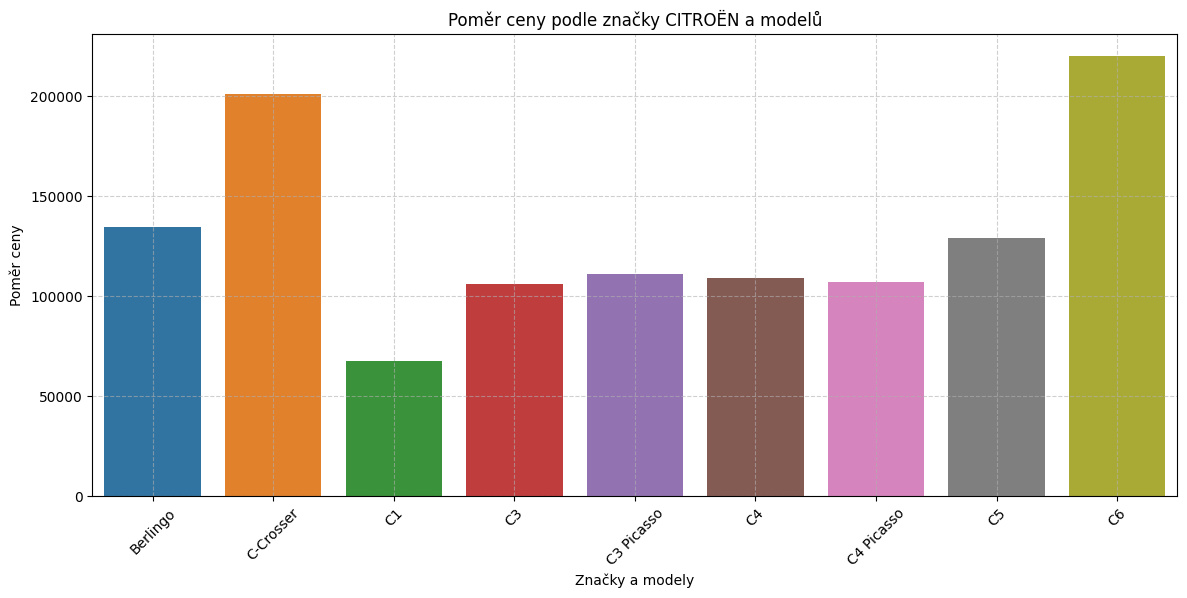

Žádné čištěné data pro značku AGADOS.
Výsledky pro značku OPEL:
  vyroba_rok_skupina znacka   nazev   skupina       avg_cena
0          2010-2012   Opel   Agila    Osobní  101299.666667
1          2010-2012   Opel  Antara    Osobní  163966.555556
2          2010-2012   Opel   Astra    Osobní  131534.281046
3          2010-2012   Opel   Combo  Užitkové  101500.000000
4          2010-2012   Opel   Corsa    Osobní  100530.888889 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku OPEL uložen jako Poměr_ceny_podle_značky_OPEL_a_modelů_15.png



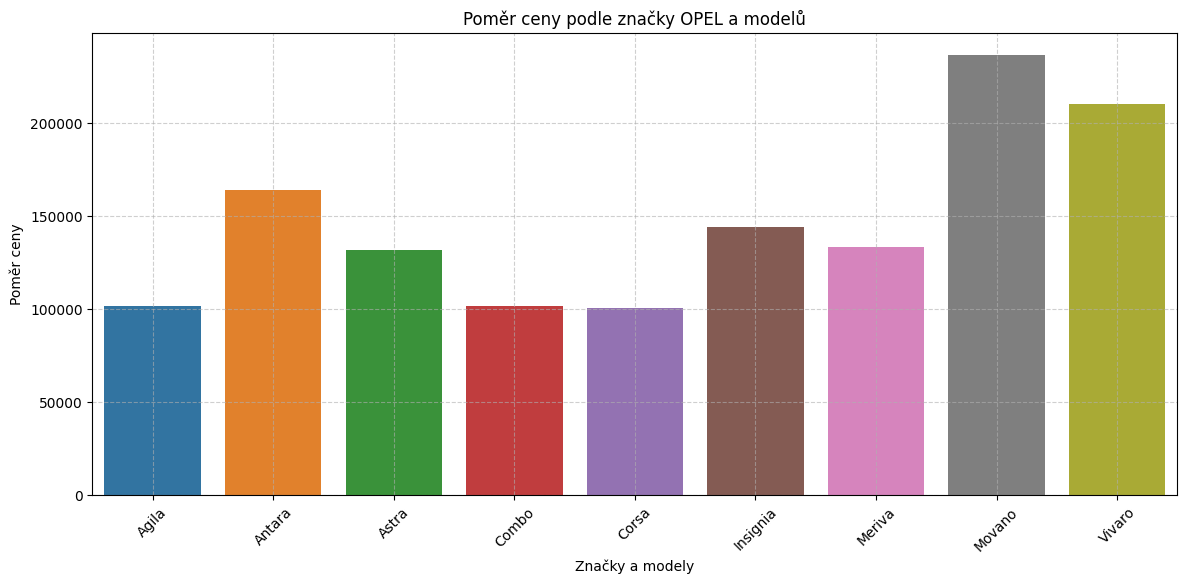

Výsledky pro značku TOYOTA:
  vyroba_rok_skupina  znacka    nazev   skupina       avg_cena
0          2010-2012  Toyota    Auris    Osobní  143688.068182
1          2010-2012  Toyota  Avensis    Osobní  173108.608696
2          2010-2012  Toyota     Aygo    Osobní   91950.000000
3          2010-2012  Toyota  Corolla    Osobní  143583.333333
4          2010-2012  Toyota   Hi-Ace  Užitkové  199000.000000 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku TOYOTA uložen jako Poměr_ceny_podle_značky_TOYOTA_a_modelů_15.png



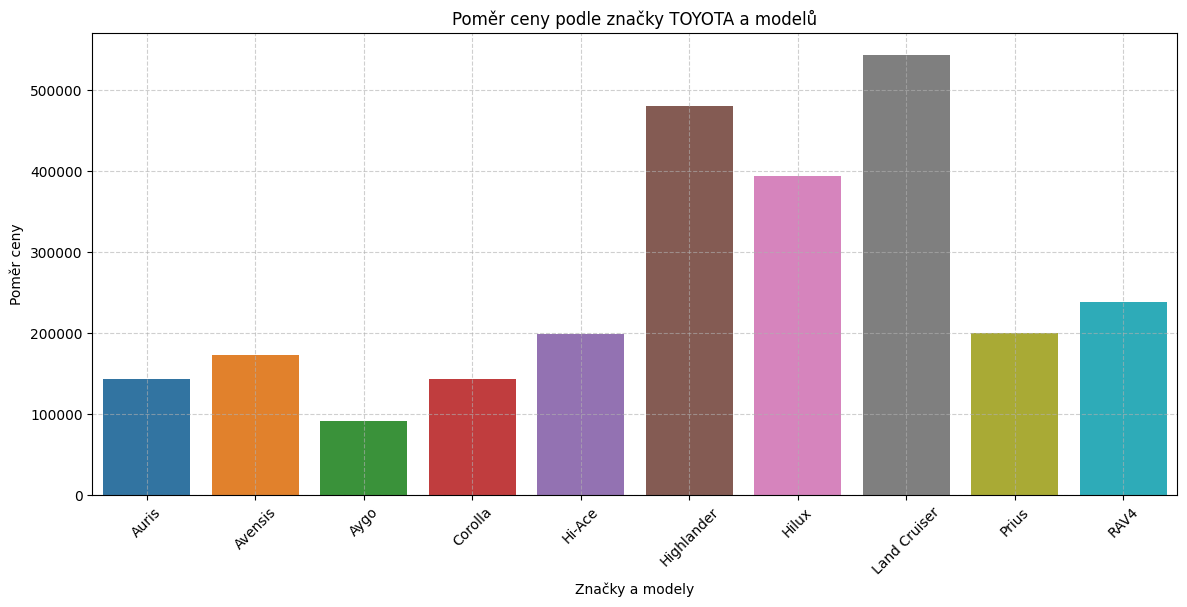

Výsledky pro značku DACIA:
  vyroba_rok_skupina znacka    nazev   skupina       avg_cena
0          2010-2012  Dacia   Duster    Osobní  163985.000000
1          2010-2012  Dacia    Logan    Osobní   69973.266667
2          2010-2012  Dacia    Logan  Užitkové   85500.000000
3          2010-2012  Dacia  Sandero    Osobní   93642.000000
4          2013-2015  Dacia   Dokker    Osobní  156766.692308 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku DACIA uložen jako Poměr_ceny_podle_značky_DACIA_a_modelů_15.png



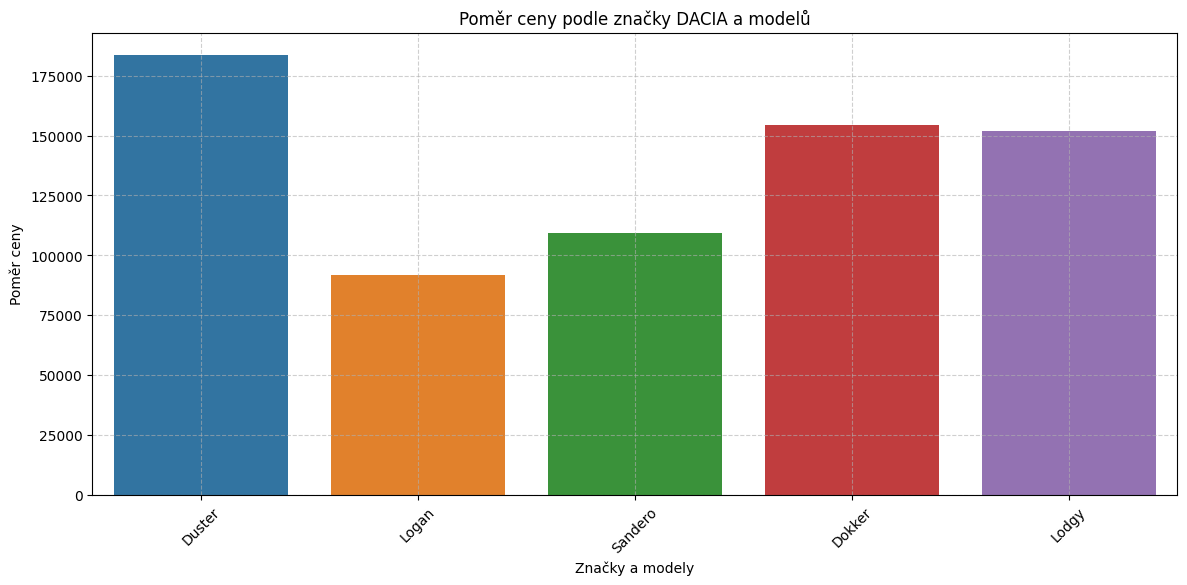

Výsledky pro značku KIA:
  vyroba_rok_skupina znacka     nazev skupina       avg_cena
0          2010-2012    Kia    Carens  Osobní  127499.500000
1          2010-2012    Kia      Ceed  Osobní  101914.103093
2          2010-2012    Kia   Picanto  Osobní   79699.900000
3          2010-2012    Kia  Pro_Ceed  Osobní  100000.000000
4          2010-2012    Kia       Rio  Osobní  101181.250000 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku KIA uložen jako Poměr_ceny_podle_značky_KIA_a_modelů_15.png



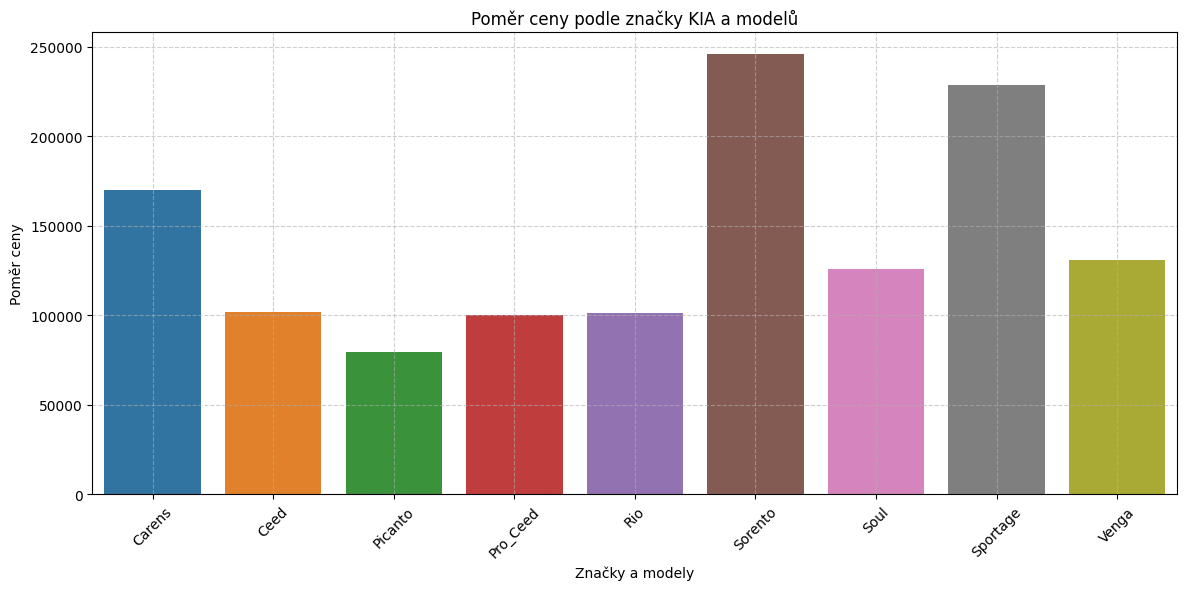

Výsledky pro značku AUDI:
  vyroba_rok_skupina znacka       nazev skupina       avg_cena
0          2010-2012   Audi          A1  Osobní  194828.571429
1          2010-2012   Audi          A3  Osobní  176154.400000
2          2010-2012   Audi          A4  Osobní  197010.682927
3          2010-2012   Audi  A4 Allroad  Osobní  210483.333333
4          2010-2012   Audi          A5  Osobní  256655.500000 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku AUDI uložen jako Poměr_ceny_podle_značky_AUDI_a_modelů_15.png



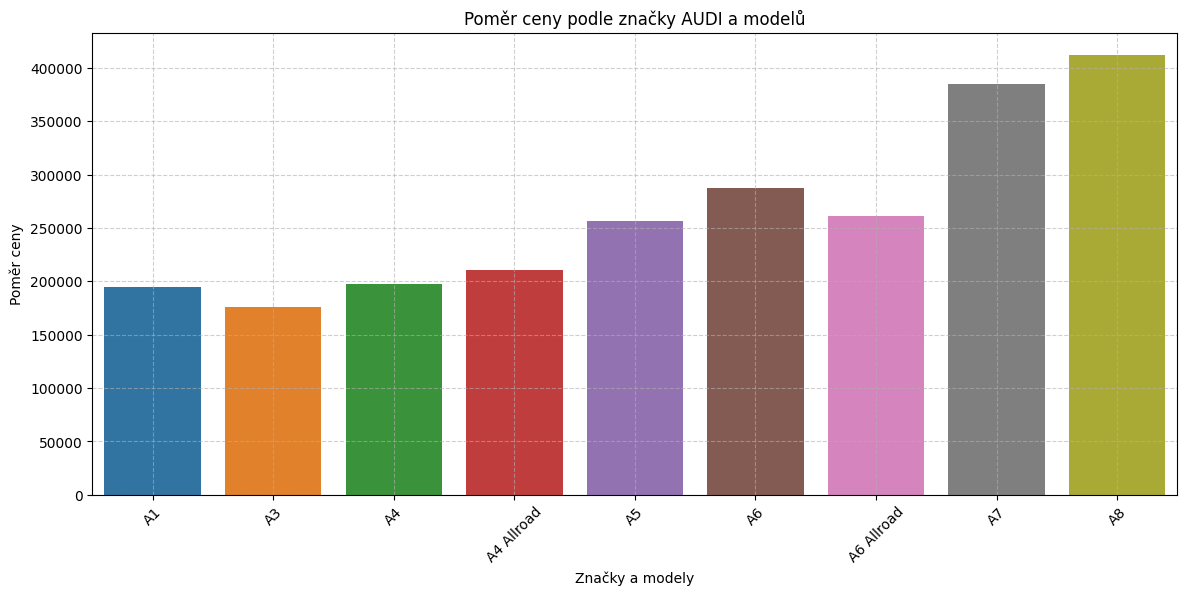

Výsledky pro značku FIAT:
  vyroba_rok_skupina znacka  nazev skupina       avg_cena
0          2010-2012   Fiat    500  Osobní  144972.727273
1          2010-2012   Fiat   500C  Osobní  124945.000000
2          2010-2012   Fiat  Bravo  Osobní   91406.187500
3          2010-2012   Fiat  Croma  Osobní   81166.166667
4          2010-2012   Fiat  Dobló  Osobní  149783.333333 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku FIAT uložen jako Poměr_ceny_podle_značky_FIAT_a_modelů_15.png



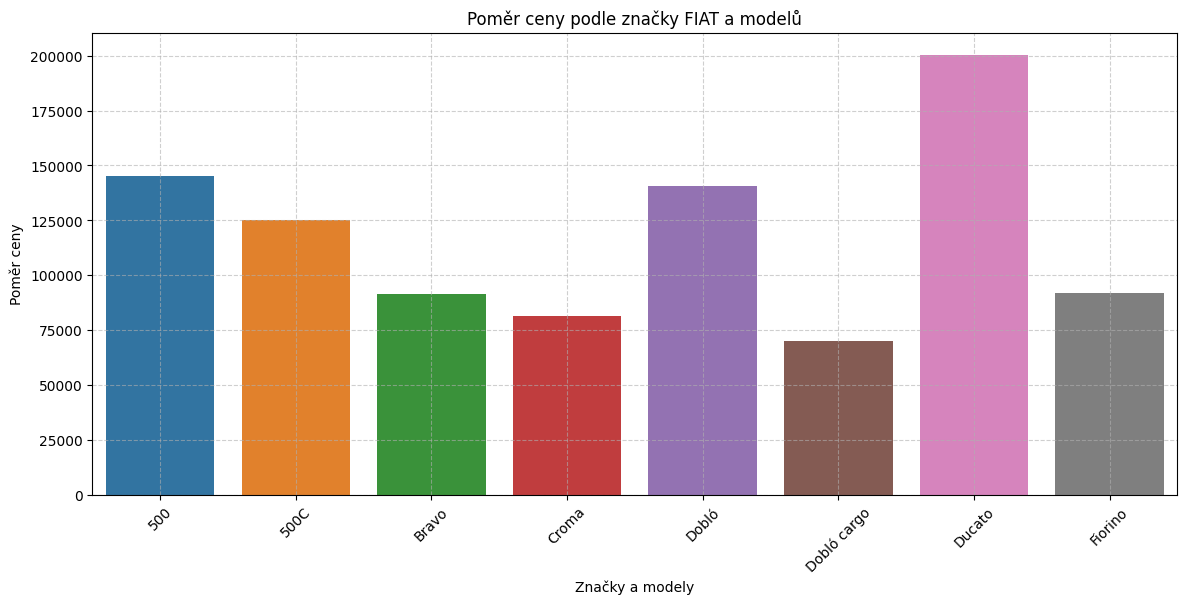

Výsledky pro značku HONDA:
  vyroba_rok_skupina znacka   nazev skupina       avg_cena
0          2010-2012  Honda  Accord  Osobní  196665.833333
1          2010-2012  Honda    CR-V  Osobní  241042.821429
2          2010-2012  Honda    CR-Z  Osobní  169725.000000
3          2010-2012  Honda    City  Osobní  105000.000000
4          2010-2012  Honda   Civic  Osobní  149058.300000 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku HONDA uložen jako Poměr_ceny_podle_značky_HONDA_a_modelů_15.png



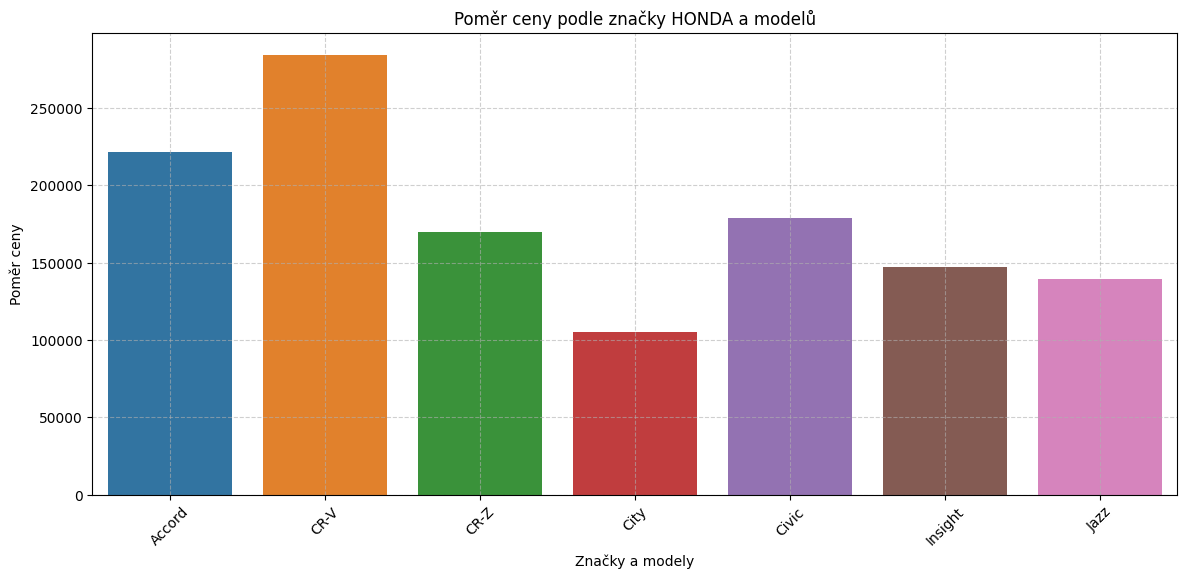

Výsledky pro značku SEAT:
  vyroba_rok_skupina znacka     nazev skupina       avg_cena
0          2010-2012   Seat  Alhambra  Osobní  239326.555556
1          2010-2012   Seat     Altea  Osobní  128067.122449
2          2010-2012   Seat   Cordoba  Osobní   70000.000000
3          2010-2012   Seat      Exeo  Osobní  156533.333333
4          2010-2012   Seat     Ibiza  Osobní  108362.415094 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku SEAT uložen jako Poměr_ceny_podle_značky_SEAT_a_modelů_15.png



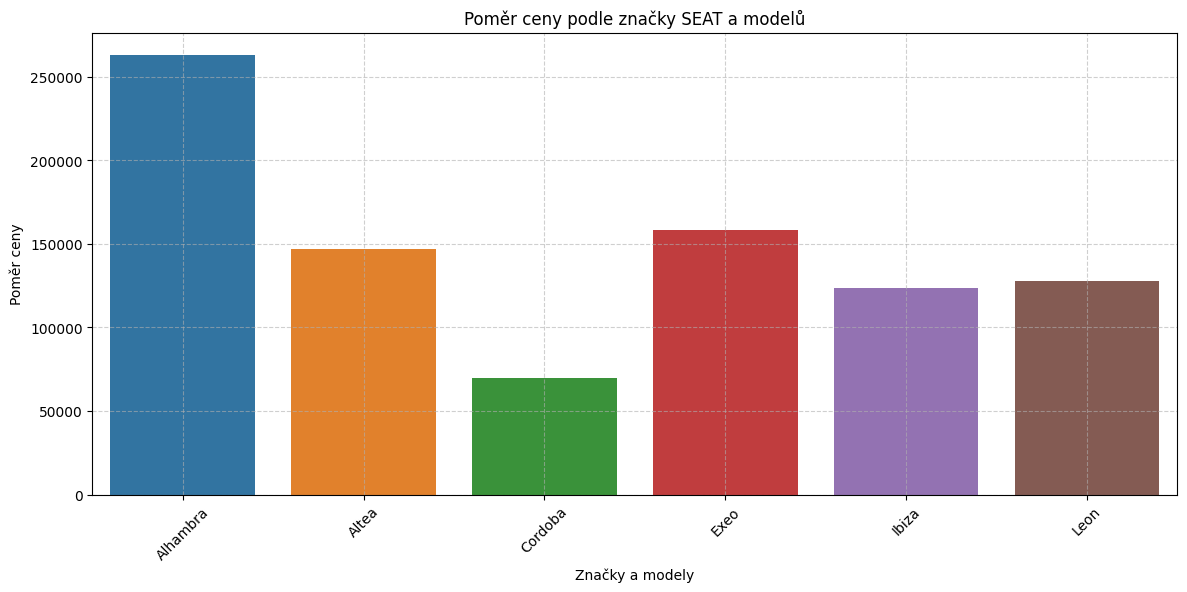

Výsledky pro značku SUZUKI:
  vyroba_rok_skupina  znacka         nazev skupina       avg_cena
0          2010-2012  Suzuki          Alto  Osobní   70000.000000
1          2010-2012  Suzuki  Grand Vitara  Osobní  212380.952381
2          2010-2012  Suzuki         Jimny  Osobní  219600.000000
3          2010-2012  Suzuki       Kizashi  Osobní  199000.000000
4          2010-2012  Suzuki           SX4  Osobní  158991.213115 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku SUZUKI uložen jako Poměr_ceny_podle_značky_SUZUKI_a_modelů_15.png



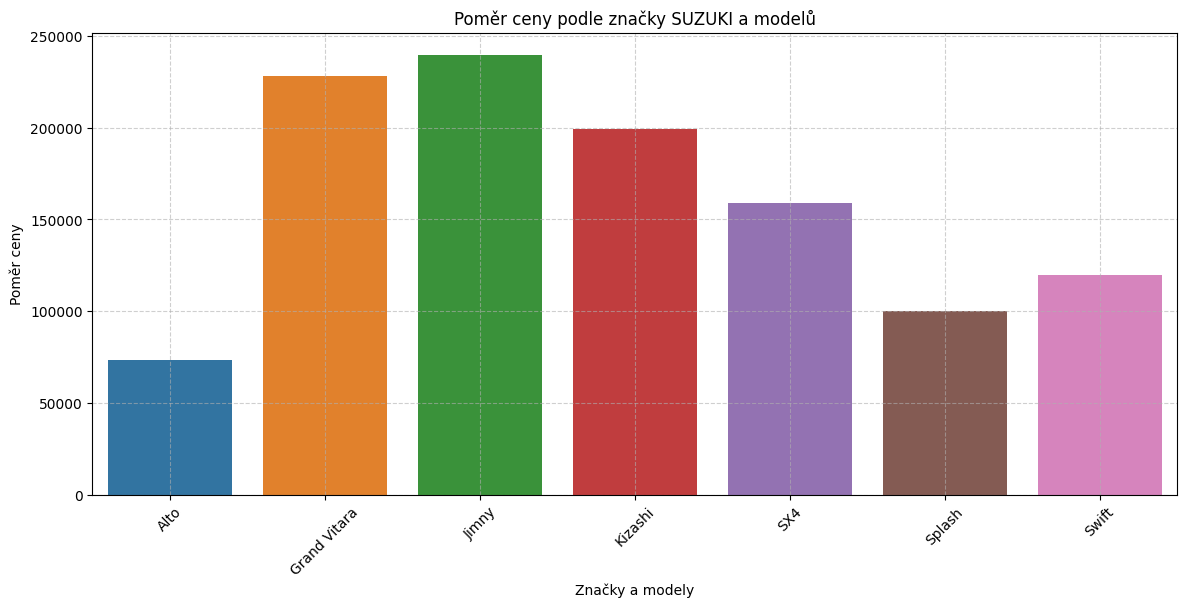

Výsledky pro značku VOLVO:
  vyroba_rok_skupina znacka nazev skupina       avg_cena
0          2010-2012  Volvo   C30  Osobní  138014.000000
1          2010-2012  Volvo   C70  Osobní  244945.000000
2          2010-2012  Volvo   S40  Osobní  153333.333333
3          2010-2012  Volvo   S60  Osobní  197532.222222
4          2010-2012  Volvo   S80  Osobní  208333.333333 



<ipython-input-31-4b56ef14b287>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Graf pro značku VOLVO uložen jako Poměr_ceny_podle_značky_VOLVO_a_modelů_15.png



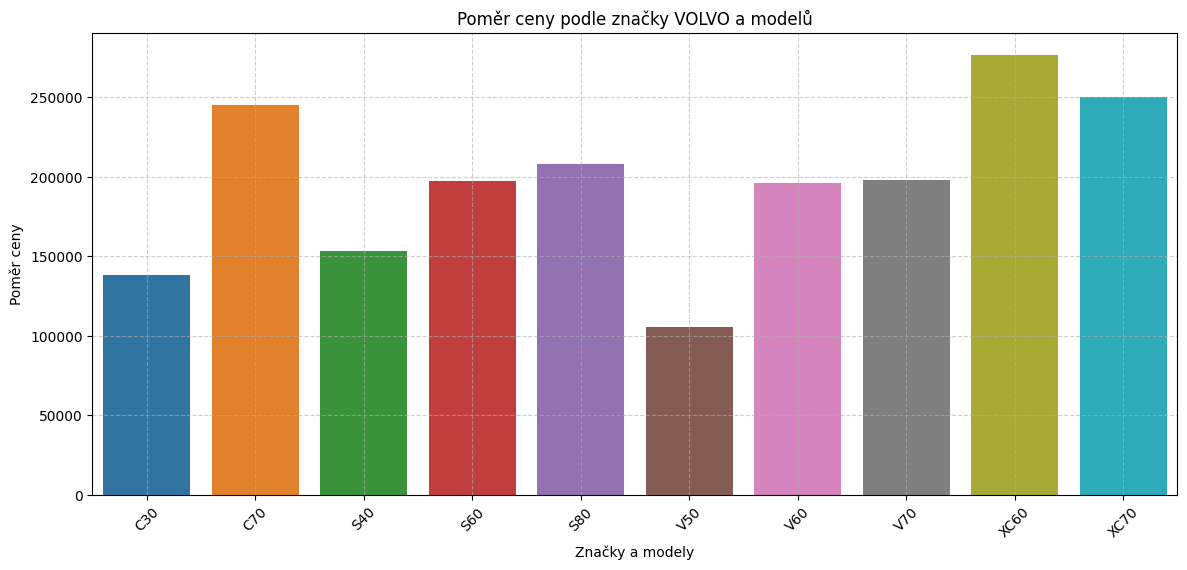

In [31]:
# Tables for every brand
for brand in brands:
    try:
        brand_data = inzeraty[inzeraty['znacka'].str.upper() == brand.upper()]

        if brand_data.empty:
            print(f"Žádná data pro značku {brand}.")
            continue

        # Filter out models matching the brand name or 'Ostatní'
        filtered_data = brand_data[~brand_data['nazev'].str.upper().isin([brand.upper(), 'OSTATNÍ'])]

        count_data = filtered_data.groupby(
            ['vyroba_rok_skupina', 'znacka', 'nazev', 'skupina']
        ).agg(
            avg_cena=('list_cena_dph', 'mean')
        ).reset_index()

        if not count_data.empty:
            globals()[f'{brand.lower()}_data'] = count_data
            print(f"Výsledky pro značku {brand}:")
            print(count_data.head(), '\n')

            # Plotting graphs
            plt.figure(figsize=(14, 6))
            sns.barplot(
                x='nazev',
                y='avg_cena',
                data=count_data.head(10),
                palette='tab10',
                errorbar=None
            )

            plt.title(f"Poměr ceny podle značky {brand} a modelů")
            plt.xlabel("Značky a modely")
            plt.ylabel("Poměr ceny")
            plt.xticks(rotation=45)
            plt.grid(True, linestyle="--", alpha=0.6)

            file_name = f'Poměr_ceny_podle_značky_{brand}_a_modelů_15.png'
            plt.savefig(file_name, bbox_inches='tight', dpi=300)
            print(f"Graf pro značku {brand} uložen jako {file_name}\n")
            plt.show()
        else:
            print(f"Žádné čištěné data pro značku {brand}.")

    except Exception as e:
        print(f"Chyba při zpracování značky {brand}: {e}\n")


In [32]:
# Output created variables
created_variables = [var for var in globals() if var.endswith('_data')]

print("Created variables:")
for var in created_variables:
    print(var)

Created variables:
count_data
count_15_data
brand_data
filtered_data
škoda_data
ford_data
hyundai_data
peugeot_data
renault_data
bmw_data
citroën_data
opel_data
toyota_data
dacia_data
kia_data
audi_data
fiat_data
honda_data
seat_data
suzuki_data
volvo_data


Graf pro značku ŠKODA uložen jako Prumerna_cena_ŠKODA_model_15_čas_období.png



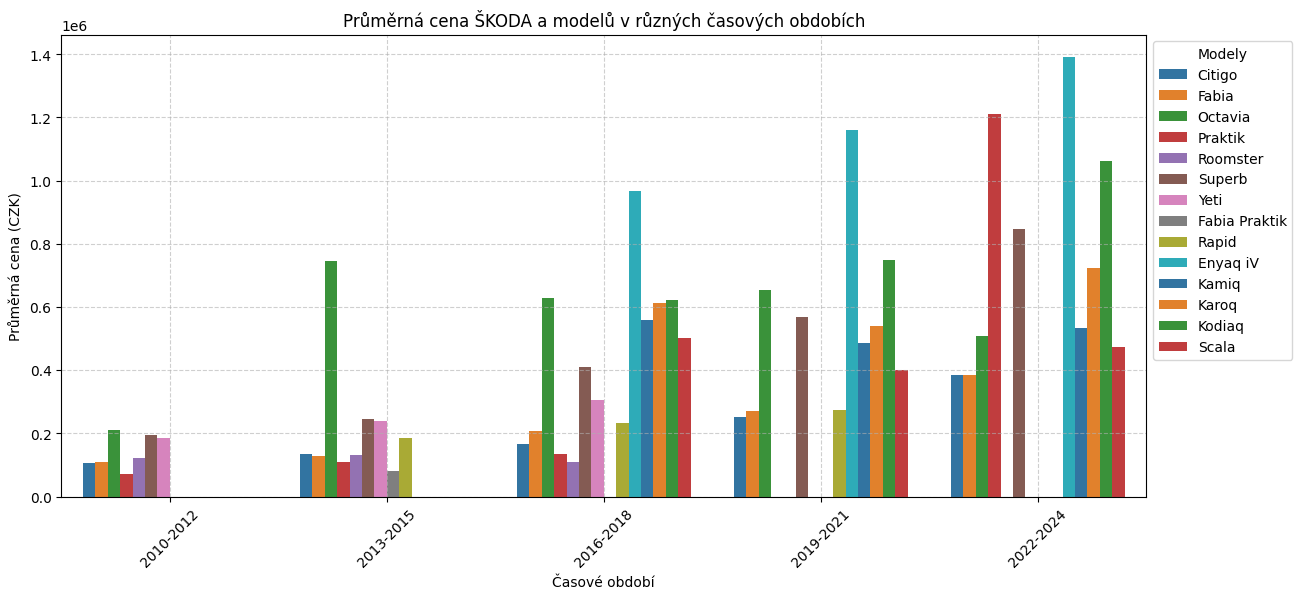

Žádná data pro značku VW.
Graf pro značku FORD uložen jako Prumerna_cena_FORD_model_15_čas_období.png



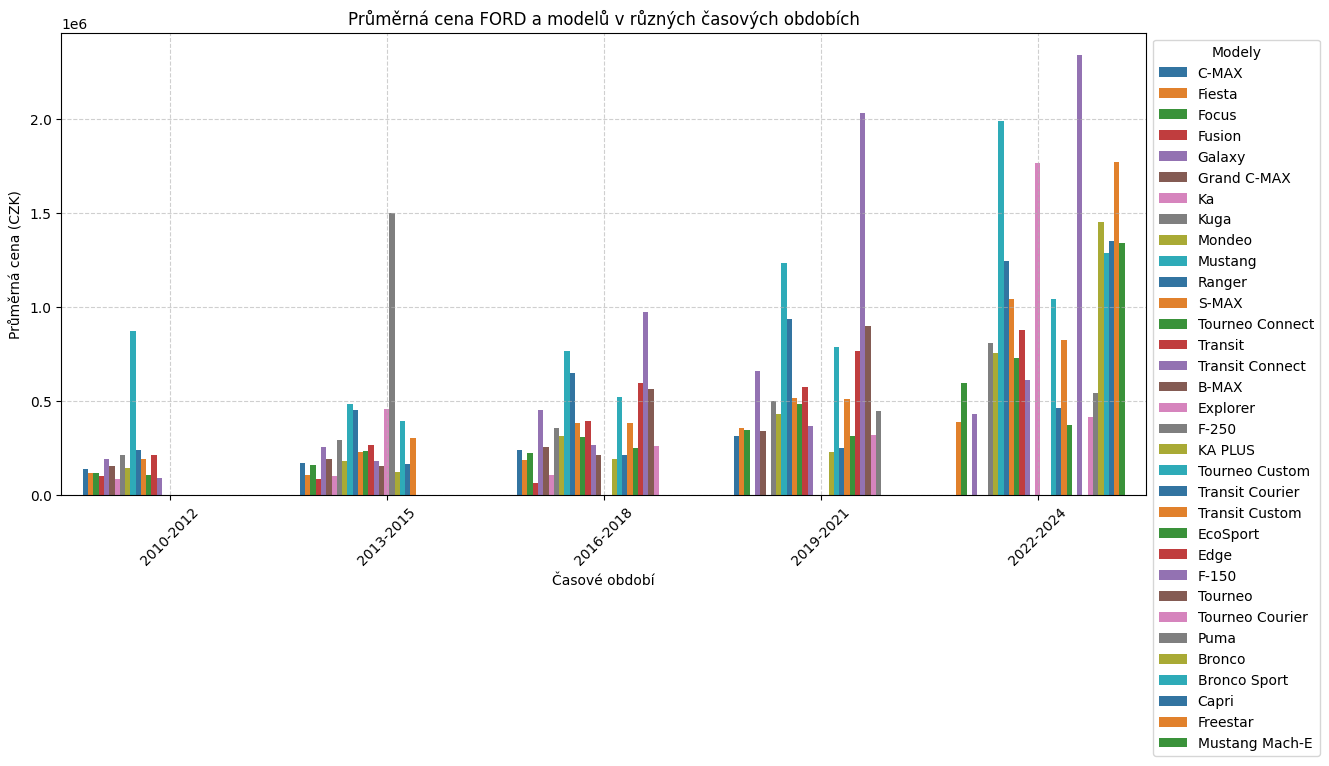

Graf pro značku HYUNDAI uložen jako Prumerna_cena_HYUNDAI_model_15_čas_období.png



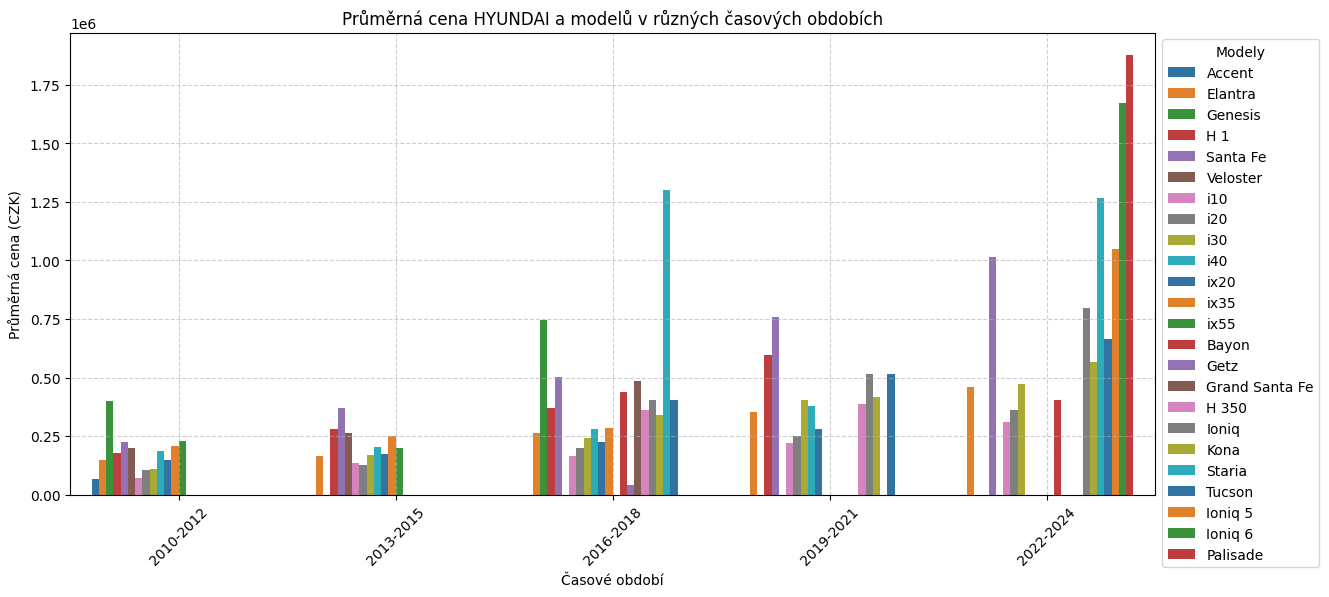

Žádná data pro značku MERCEDES.
Graf pro značku PEUGEOT uložen jako Prumerna_cena_PEUGEOT_model_15_čas_období.png



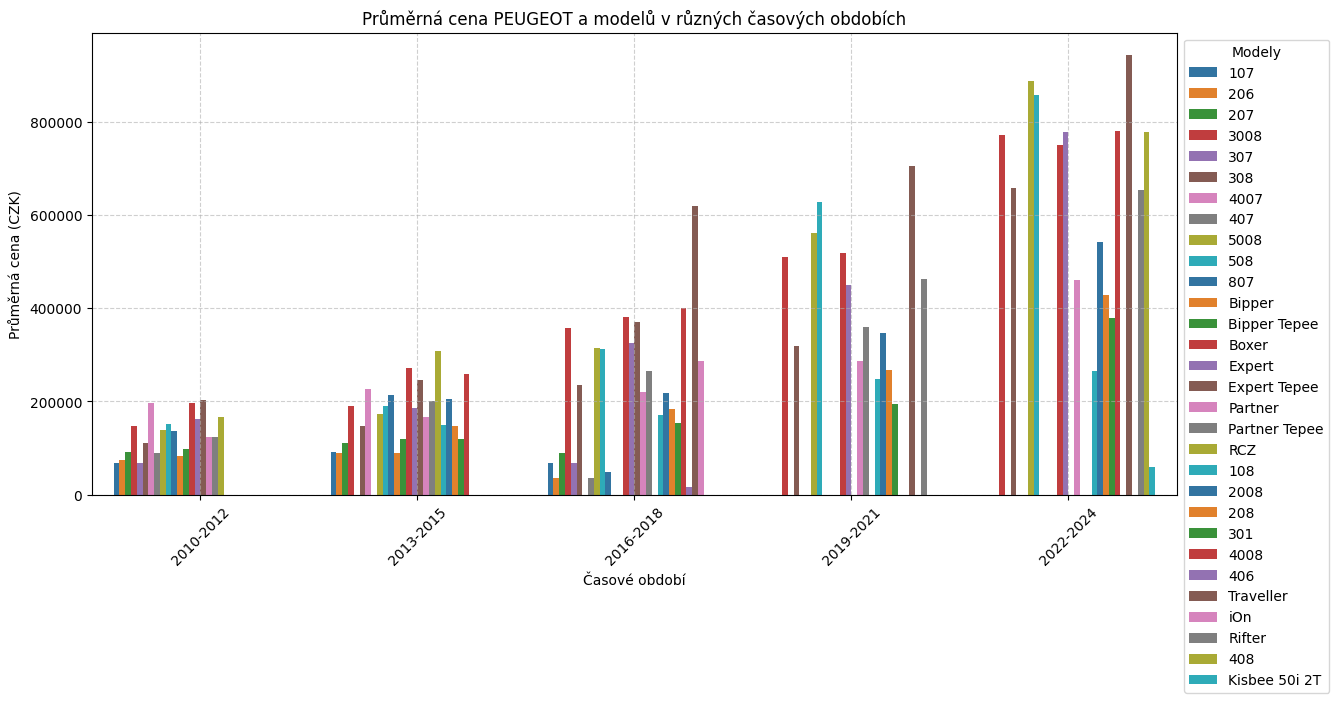

Graf pro značku RENAULT uložen jako Prumerna_cena_RENAULT_model_15_čas_období.png



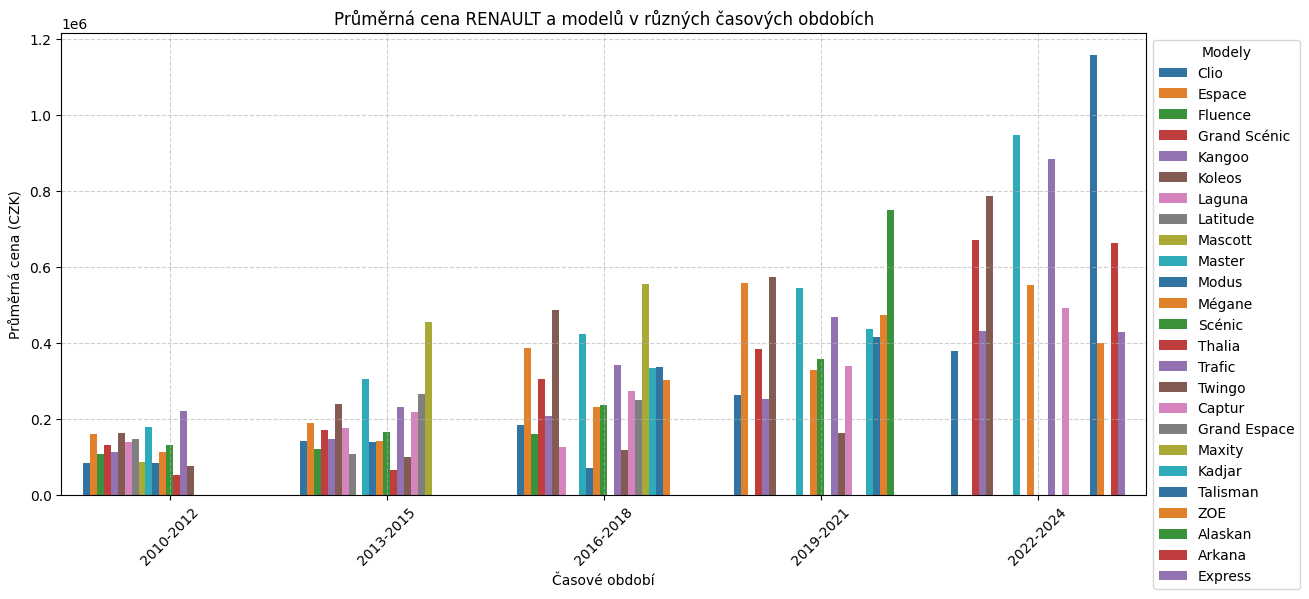

Graf pro značku BMW uložen jako Prumerna_cena_BMW_model_15_čas_období.png



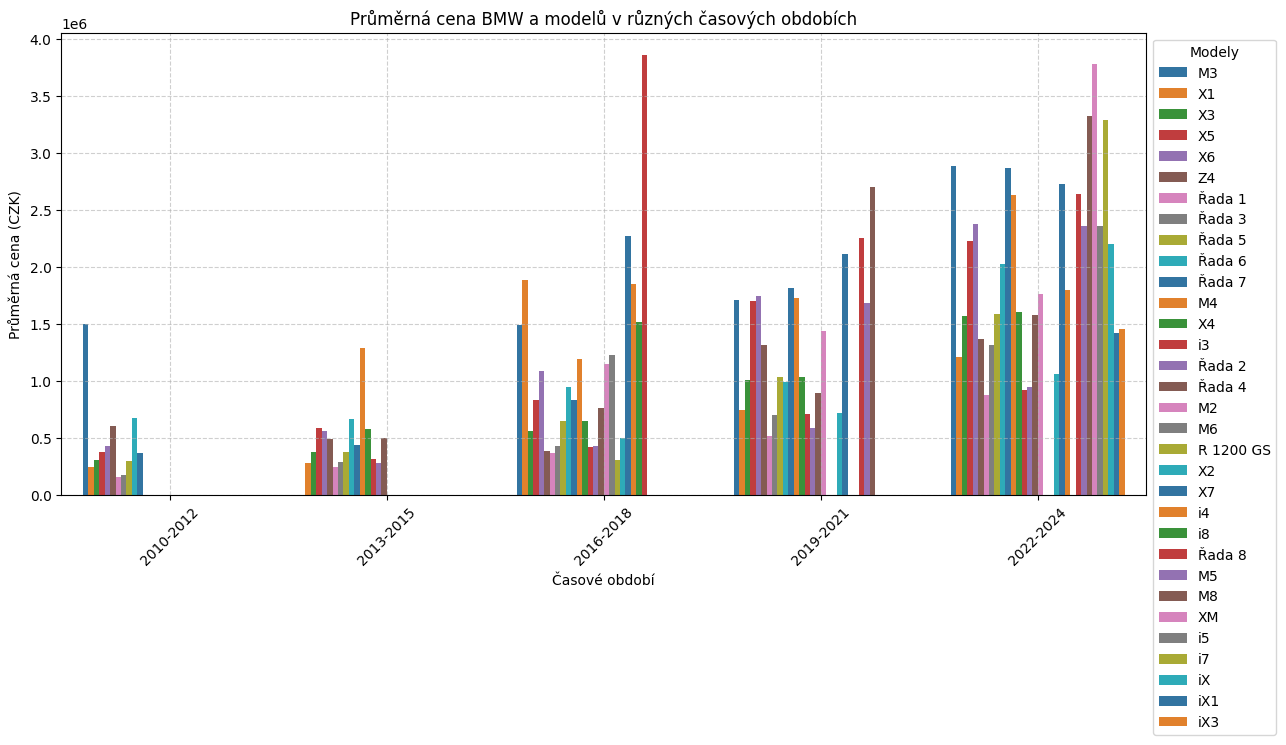

Graf pro značku CITROËN uložen jako Prumerna_cena_CITROËN_model_15_čas_období.png



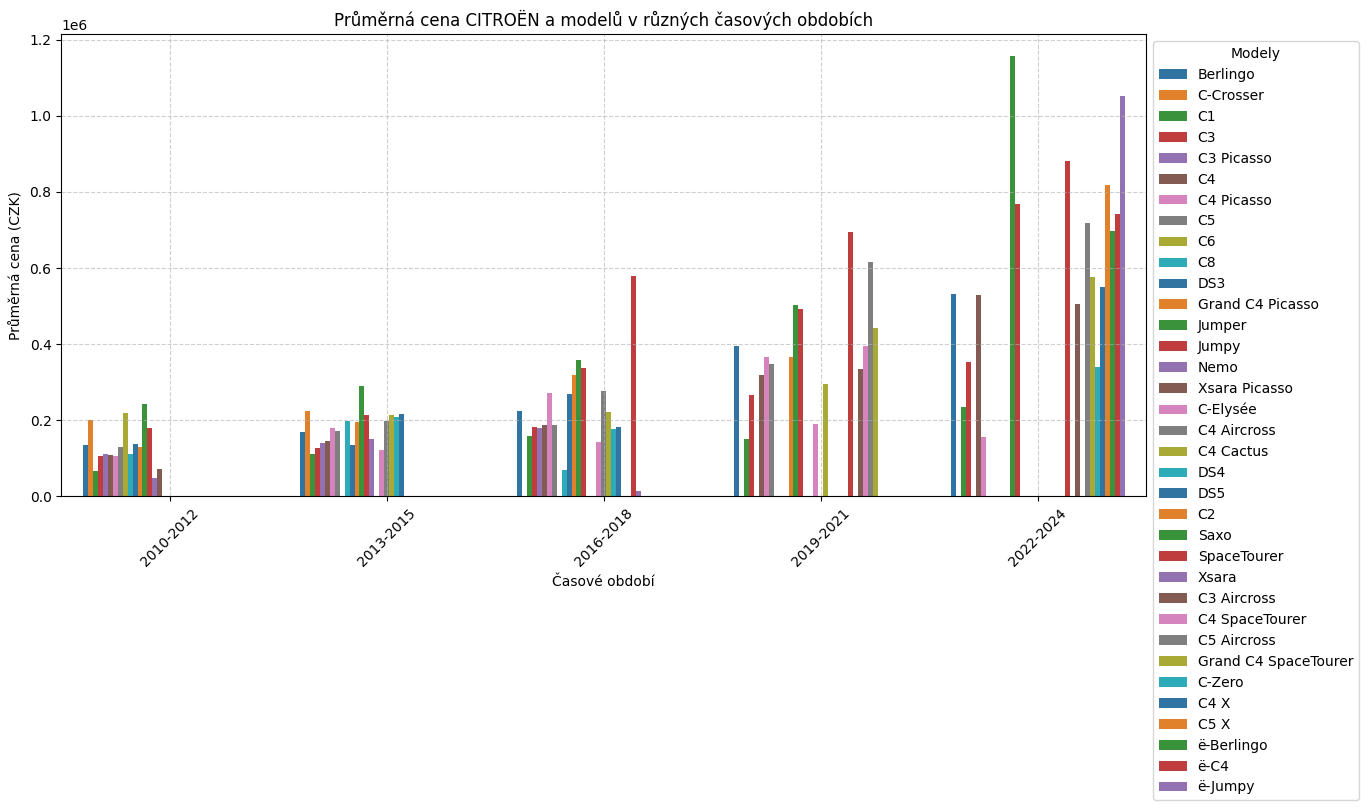

Žádné čištěné data pro značku AGADOS.
Graf pro značku OPEL uložen jako Prumerna_cena_OPEL_model_15_čas_období.png



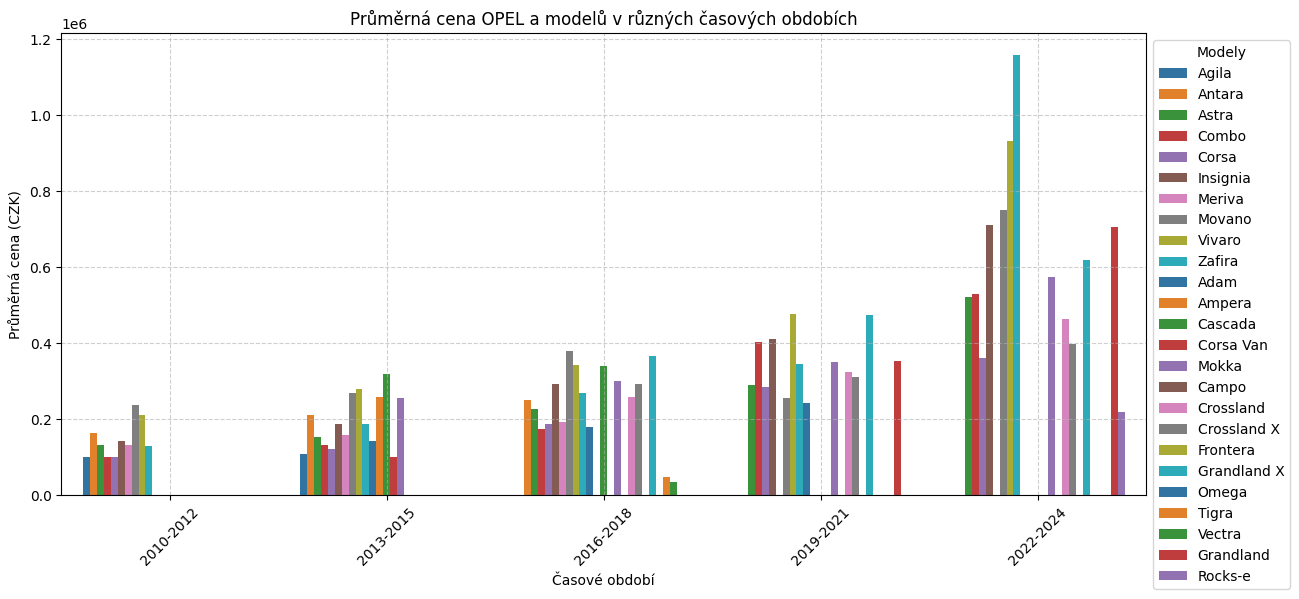

Graf pro značku TOYOTA uložen jako Prumerna_cena_TOYOTA_model_15_čas_období.png



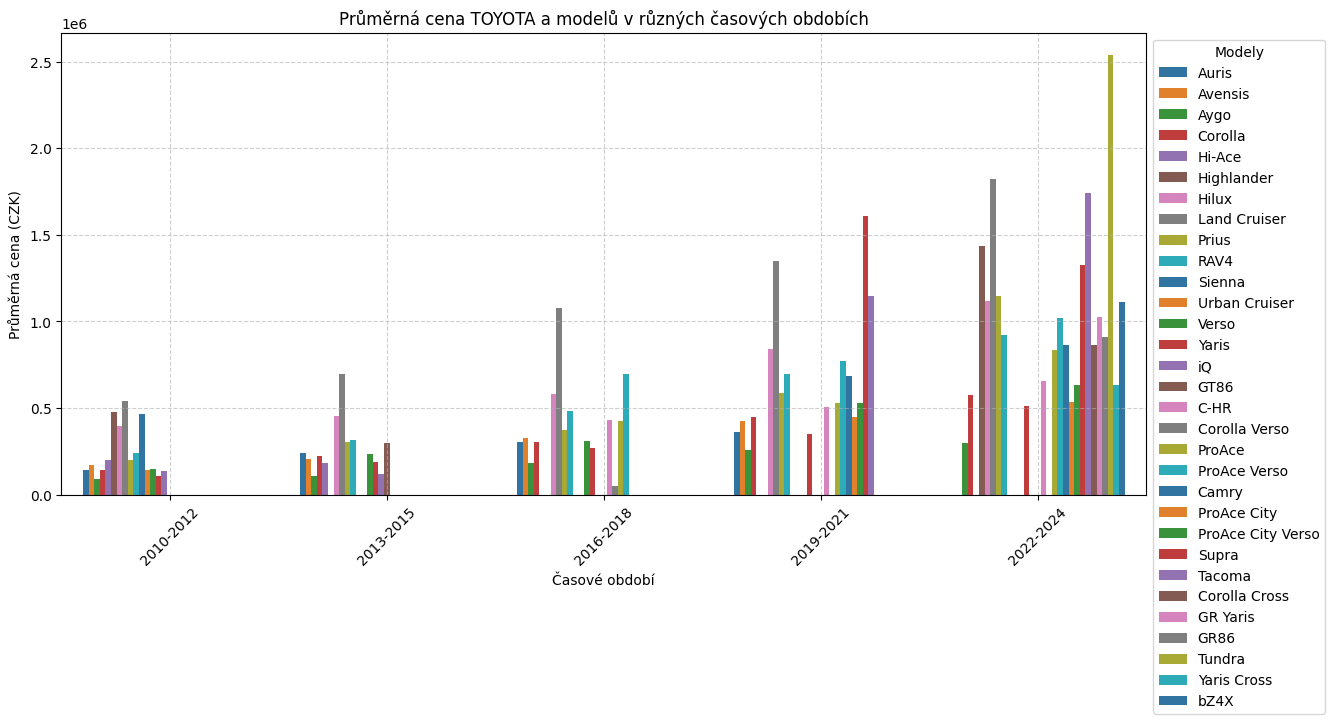

Graf pro značku DACIA uložen jako Prumerna_cena_DACIA_model_15_čas_období.png



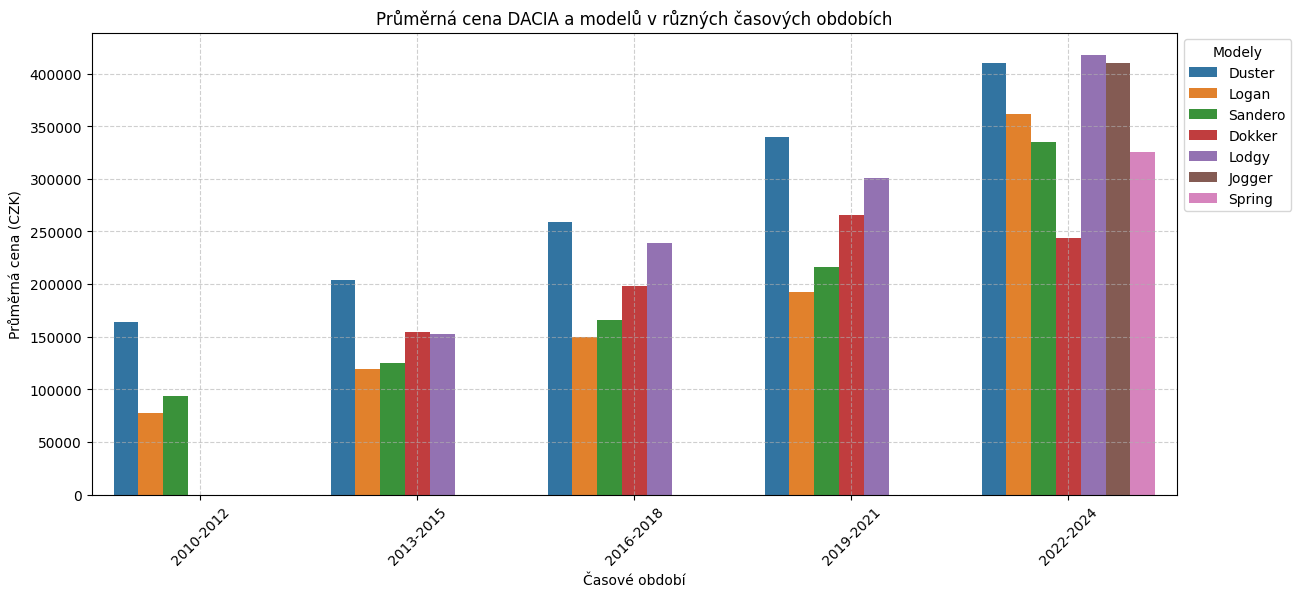

Graf pro značku KIA uložen jako Prumerna_cena_KIA_model_15_čas_období.png



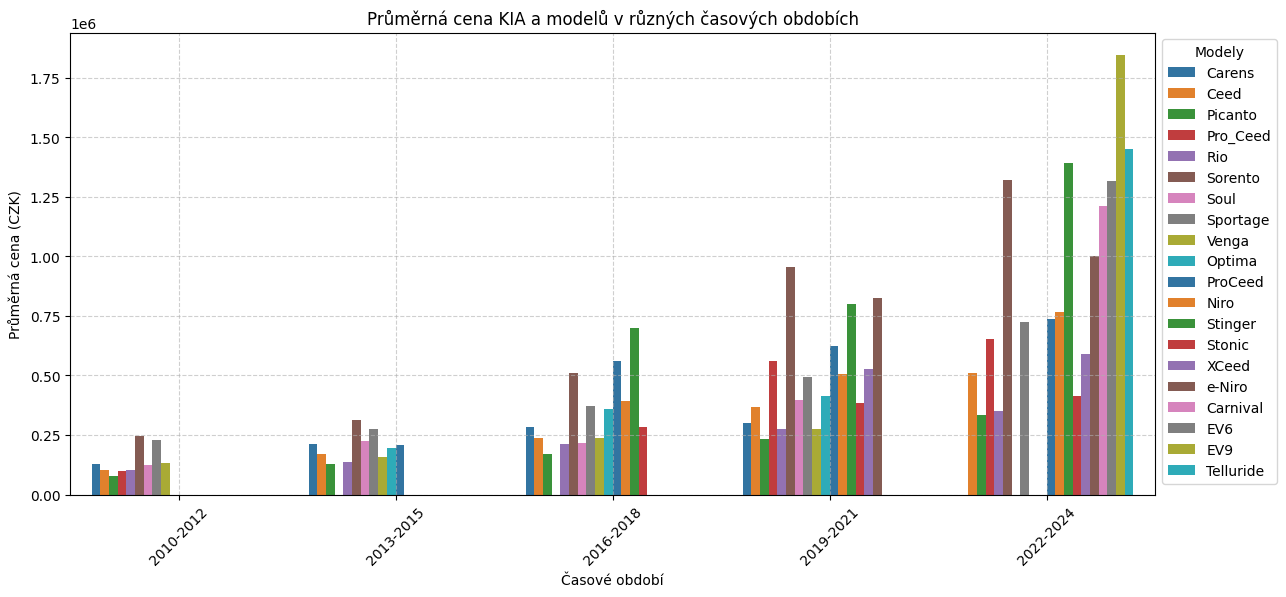

Graf pro značku AUDI uložen jako Prumerna_cena_AUDI_model_15_čas_období.png



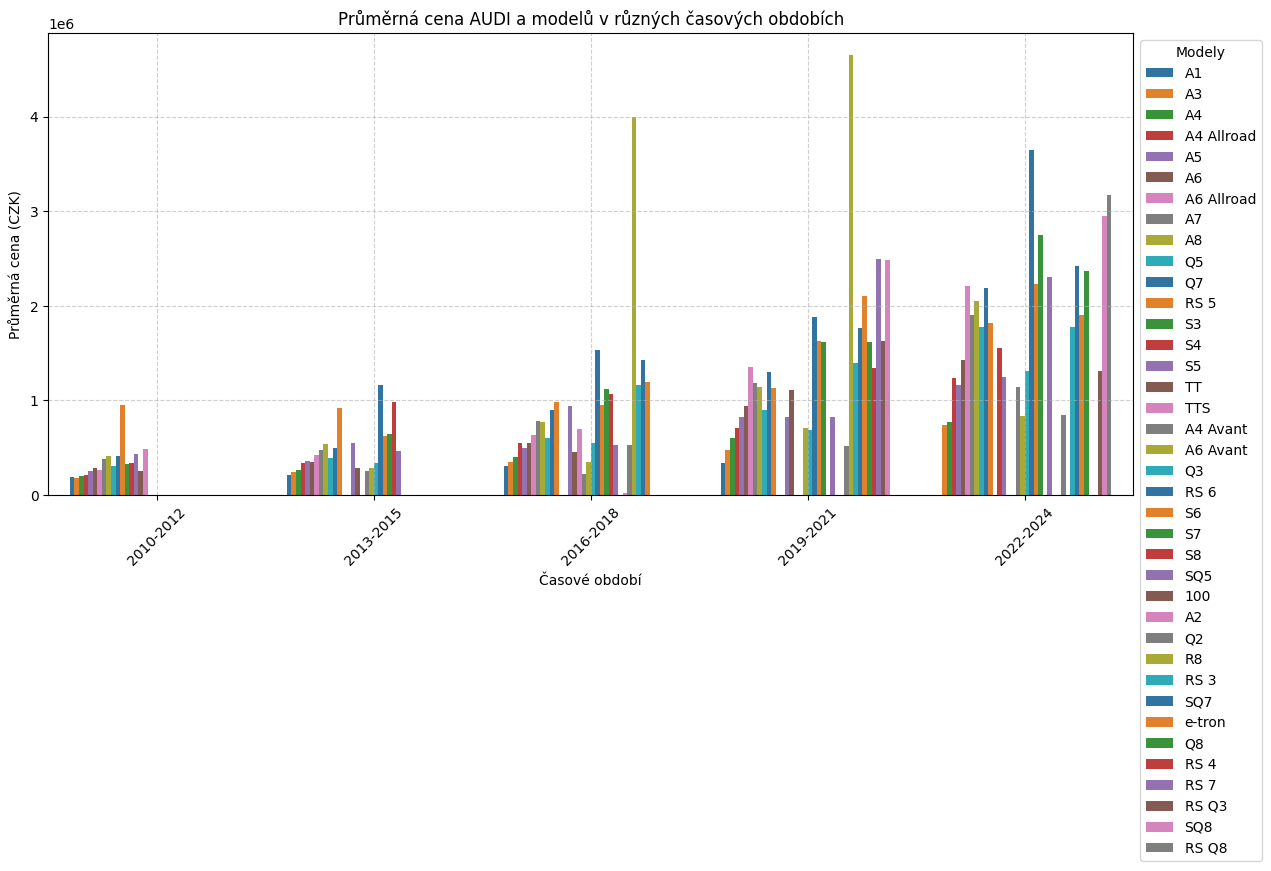

Graf pro značku FIAT uložen jako Prumerna_cena_FIAT_model_15_čas_období.png



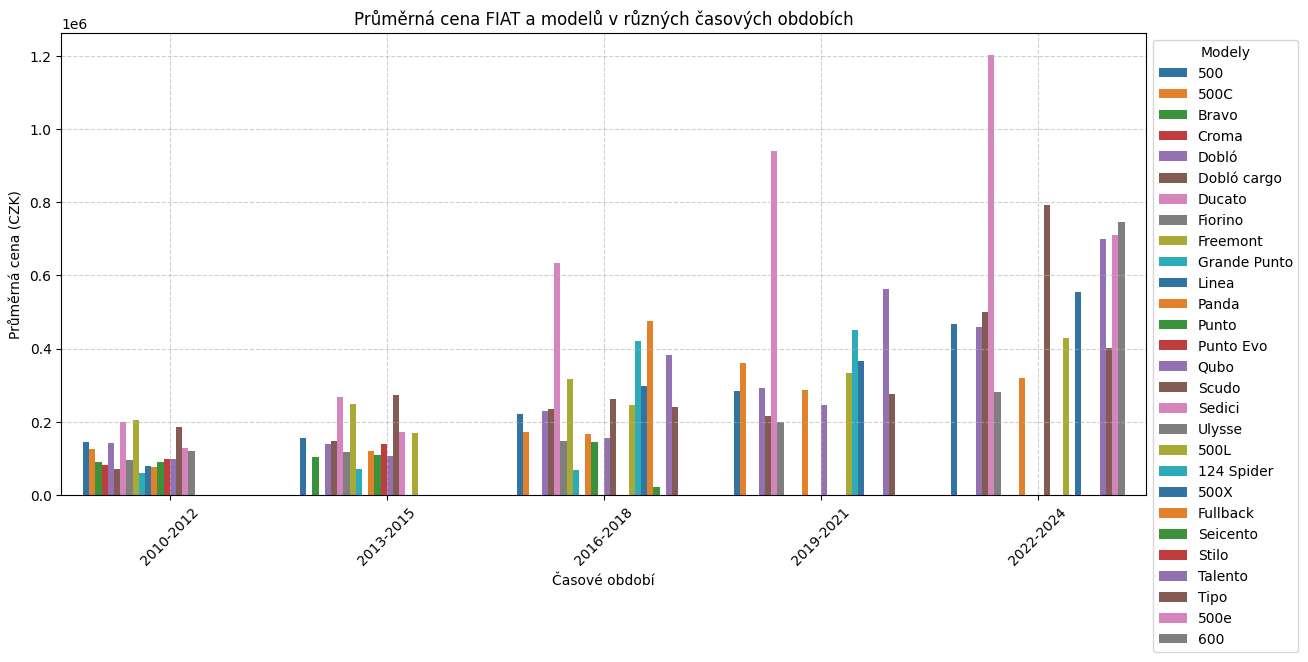

Graf pro značku HONDA uložen jako Prumerna_cena_HONDA_model_15_čas_období.png



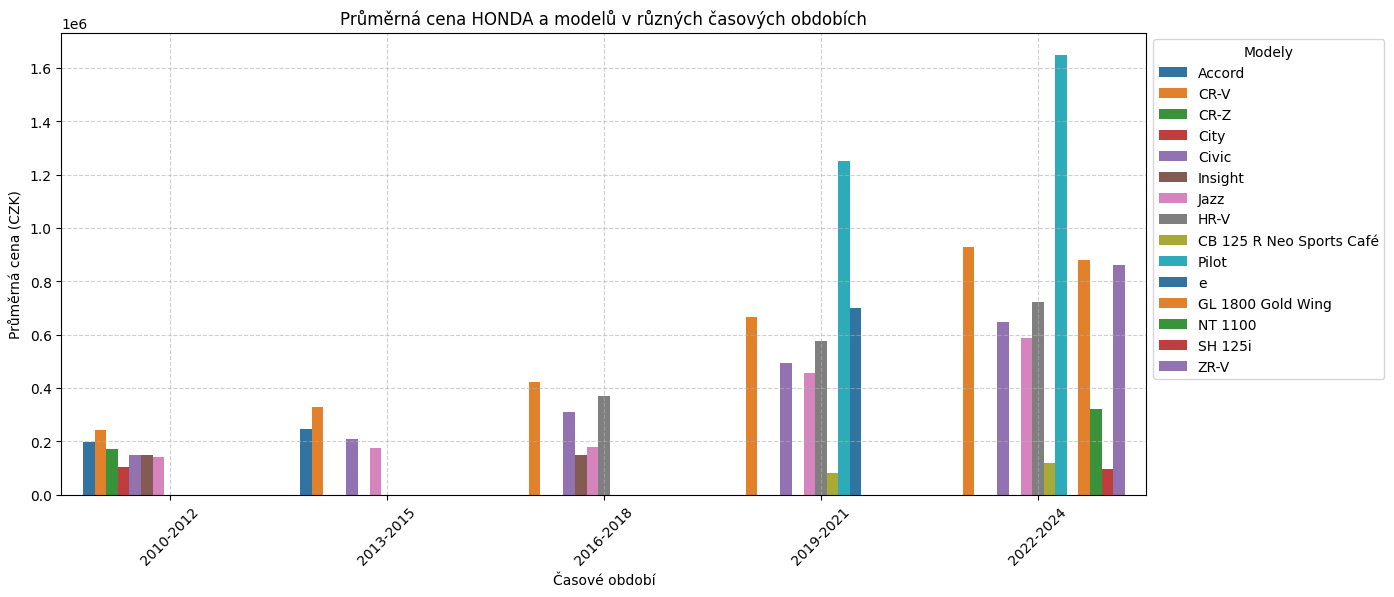

Graf pro značku SEAT uložen jako Prumerna_cena_SEAT_model_15_čas_období.png



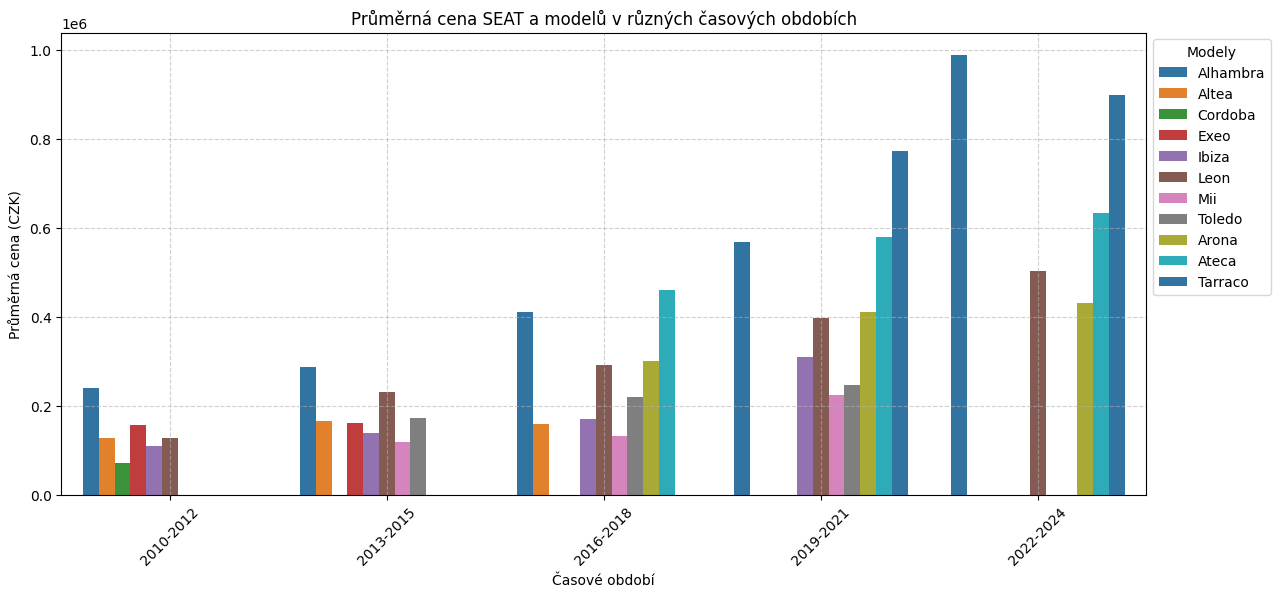

Graf pro značku SUZUKI uložen jako Prumerna_cena_SUZUKI_model_15_čas_období.png



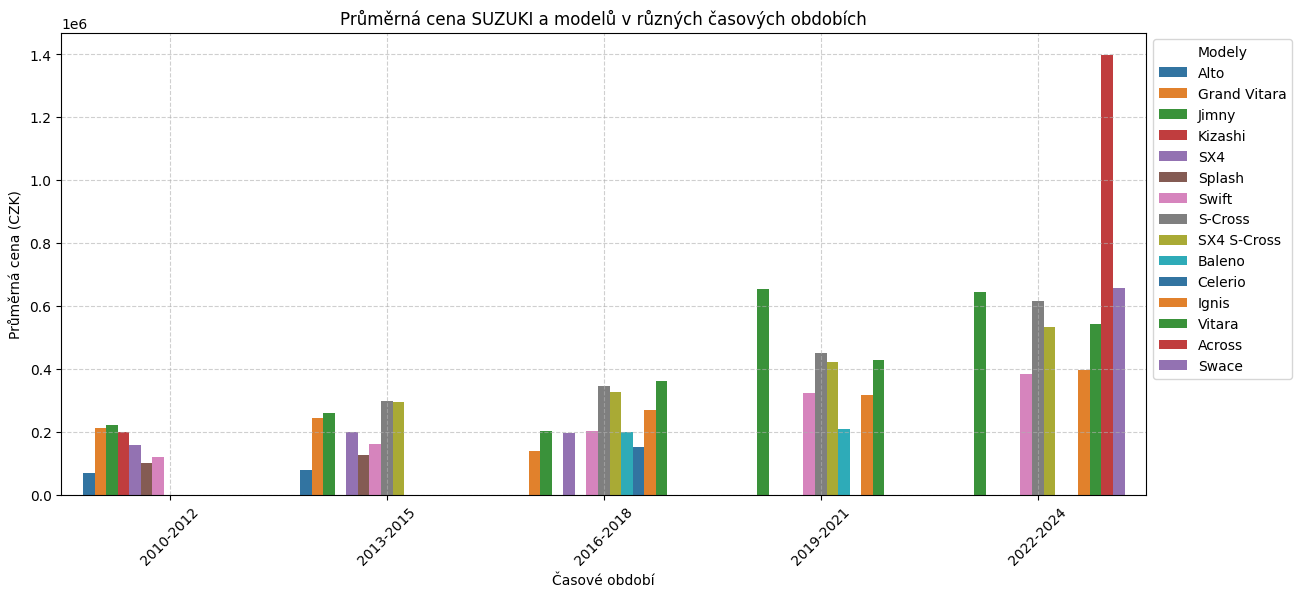

Graf pro značku VOLVO uložen jako Prumerna_cena_VOLVO_model_15_čas_období.png



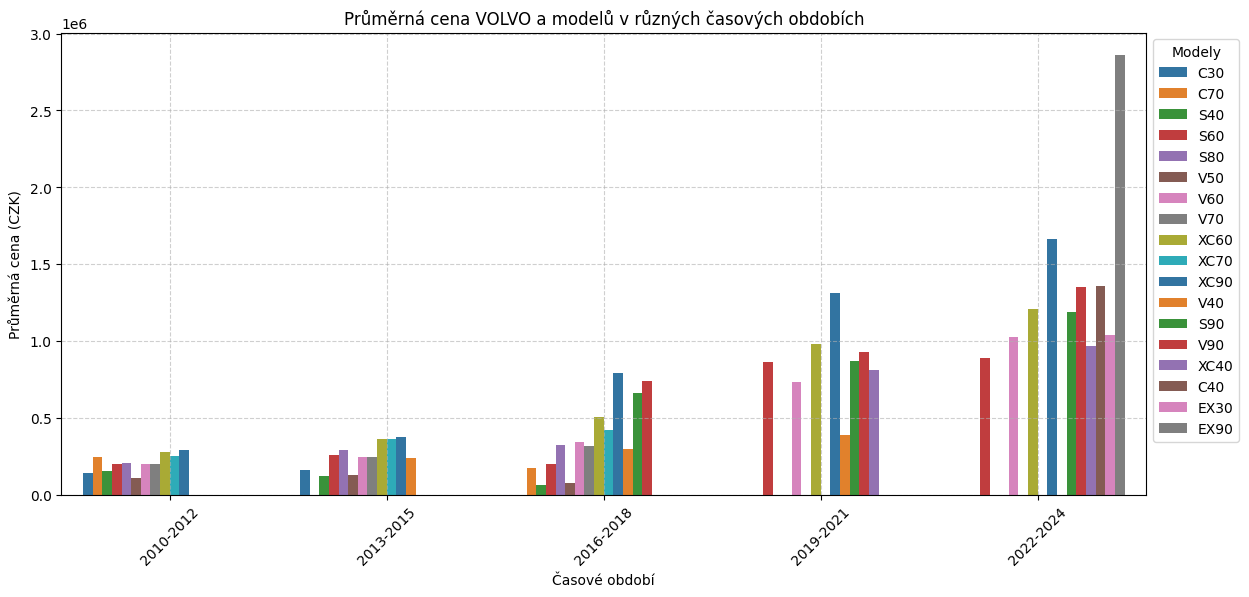

In [33]:
period_order = ['2010-2012', '2013-2015', '2016-2018', '2019-2021', '2022-2024']

for brand in brands:
    try:
        brand_data = inzeraty[inzeraty['znacka'].str.upper() == brand.upper()]

        if brand_data.empty:
            print(f"Žádná data pro značku {brand}.")
            continue

        # Vyloučit modely s názvy, které odpovídají značce nebo „Ostatní“.
        filtered_data = brand_data[~brand_data['nazev'].str.upper().isin([brand.upper(), 'OSTATNÍ'])]

        count_data = filtered_data.groupby(
            ['vyroba_rok_skupina', 'znacka', 'nazev', 'skupina']
        ).agg(
            avg_cena=('list_cena_dph', 'mean')
        ).reset_index()

        if count_data.empty:
            print(f"Žádné čištěné data pro značku {brand}.")
            continue

        plt.figure(figsize=(14, 6))
        sns.barplot(
            x='vyroba_rok_skupina',
            y='avg_cena',
            hue='nazev',
            data=count_data,
            palette='tab10',
            errorbar=None,
            order=period_order
        )

        plt.title(f"Průměrná cena {brand} a modelů v různých časových obdobích")
        plt.xlabel("Časové období")
        plt.ylabel("Průměrná cena (CZK)")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Modely')

        file_name = f'Prumerna_cena_{brand}_model_15_čas_období.png'
        plt.savefig(file_name, bbox_inches='tight', dpi=300)
        print(f"Graf pro značku {brand} uložen jako {file_name}\n")
        plt.show()

    except Exception as e:
        print(f"Chyba při zpracování značky {brand}: {e}\n")


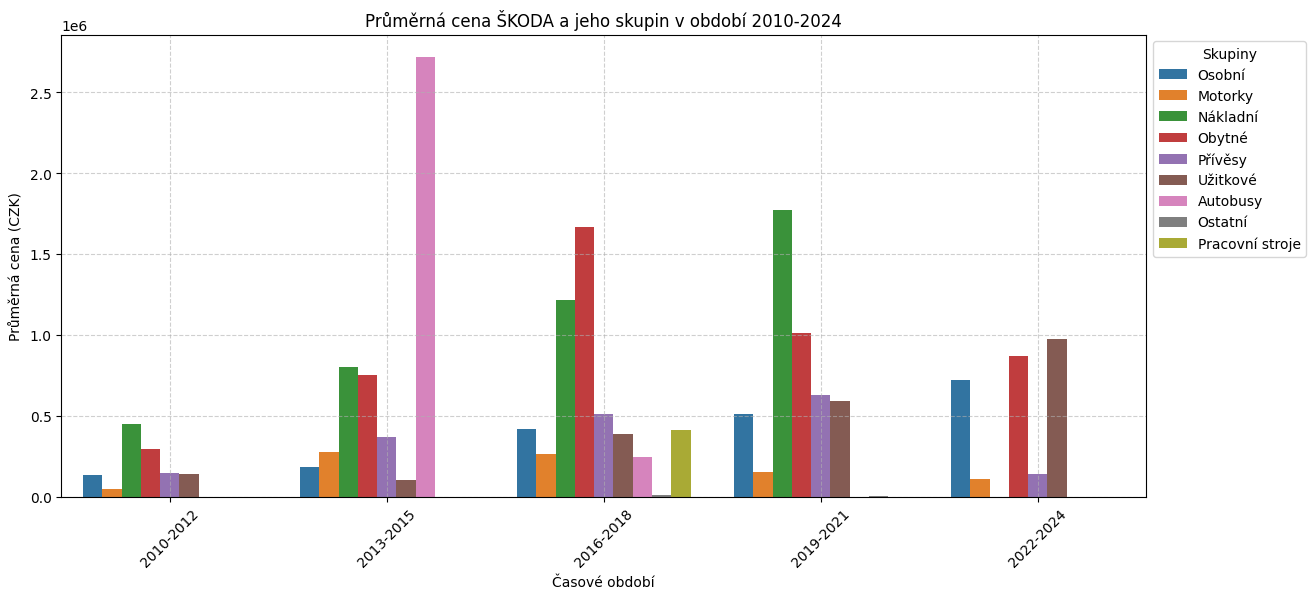

Žádná data pro značku VW.


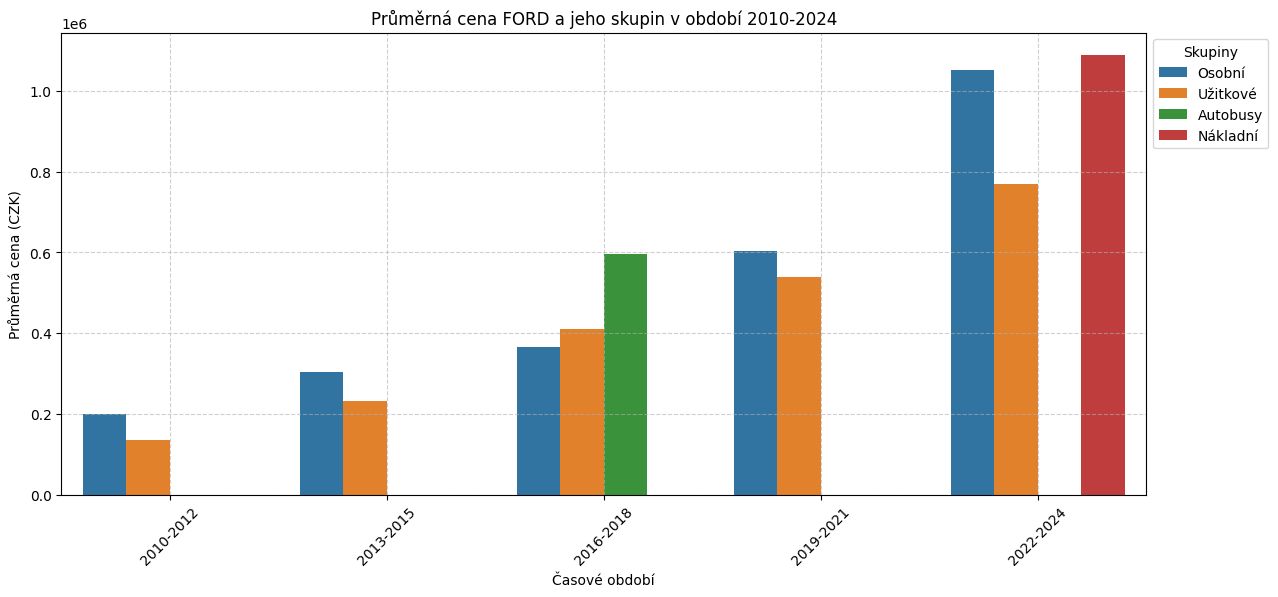

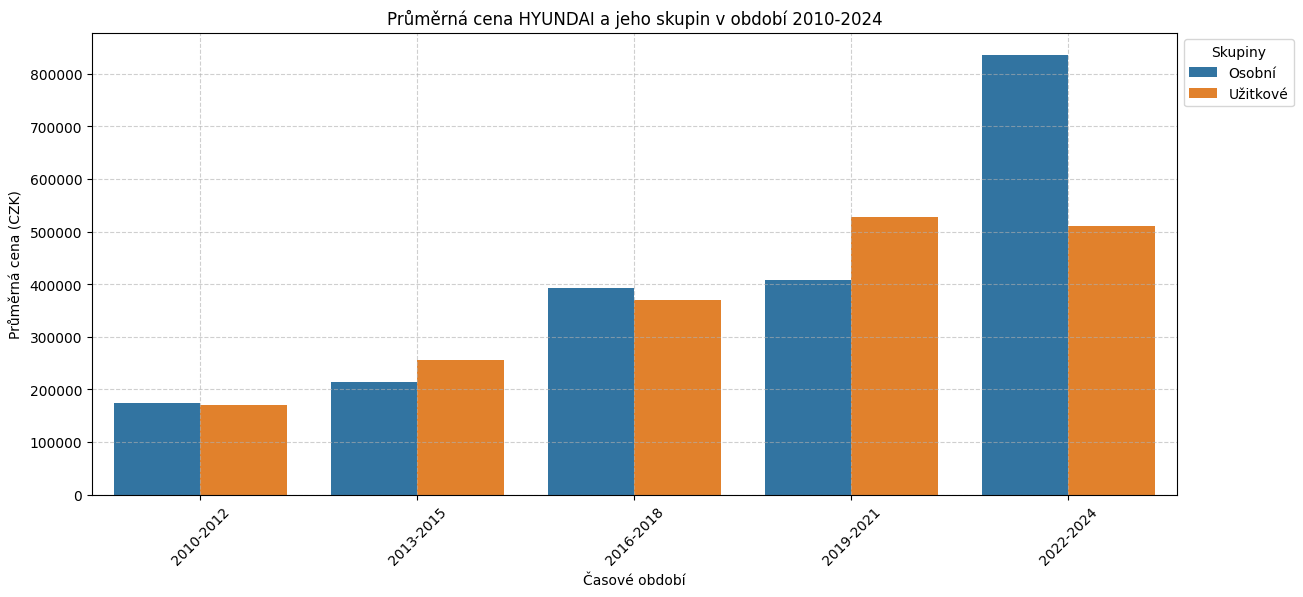

Žádná data pro značku MERCEDES.


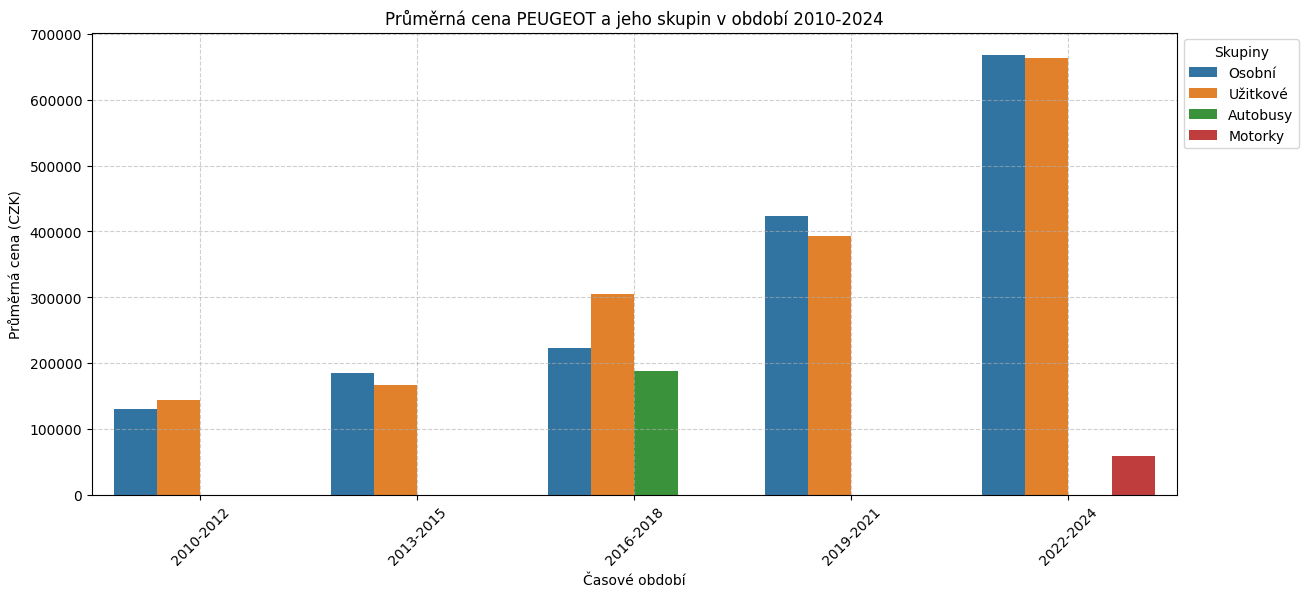

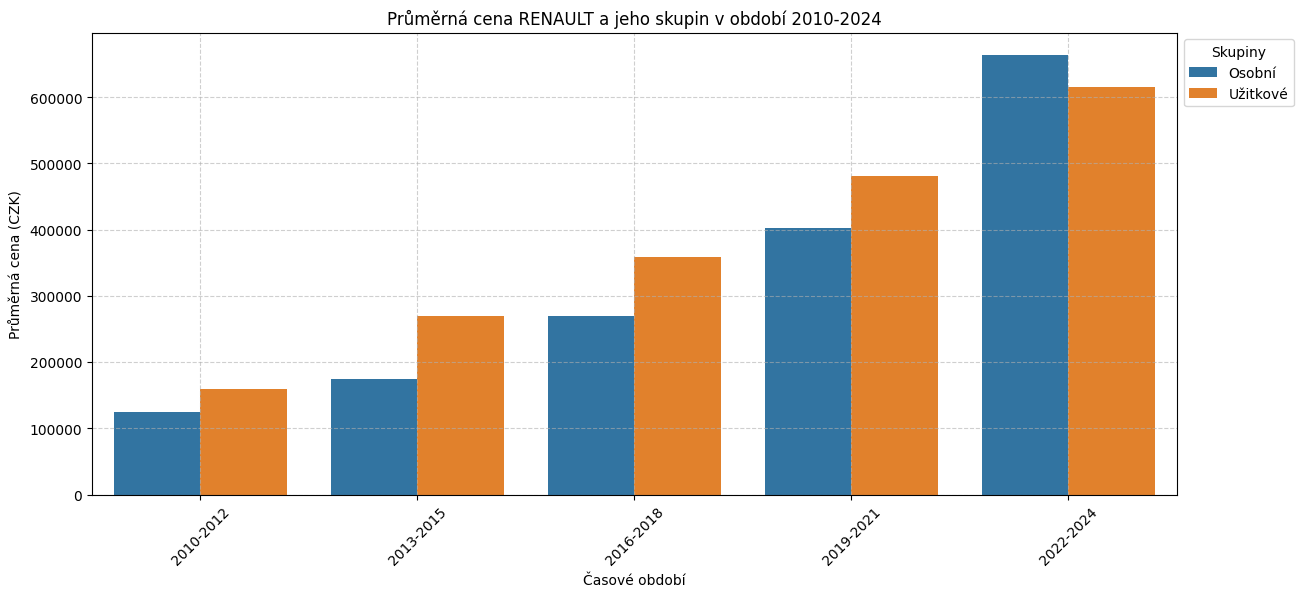

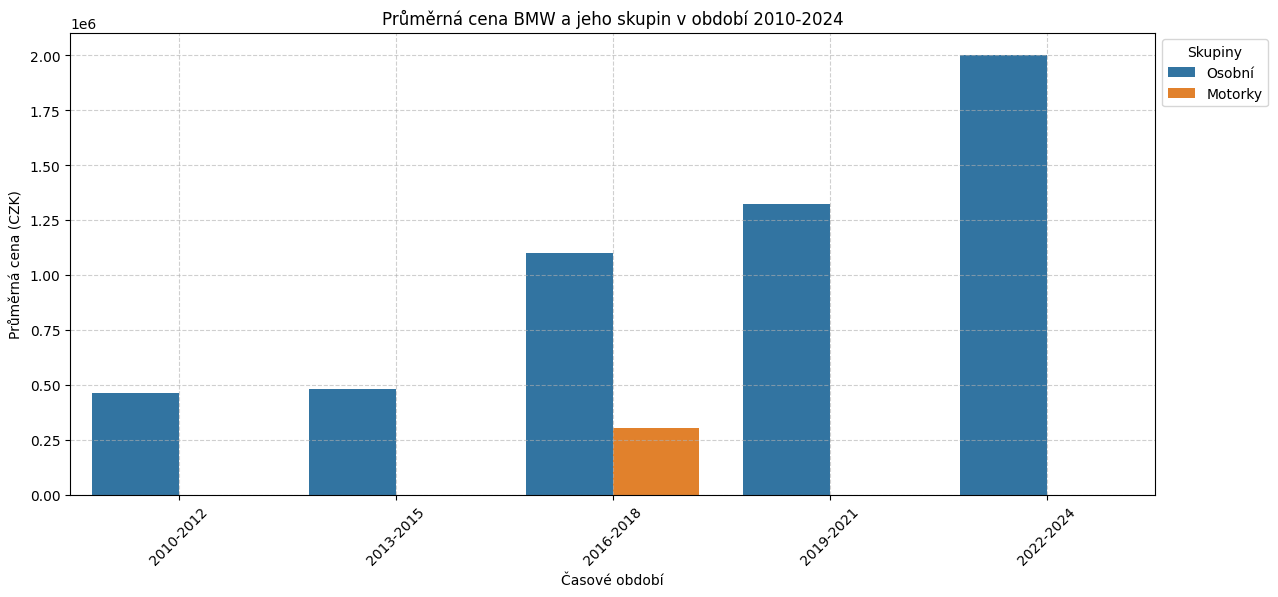

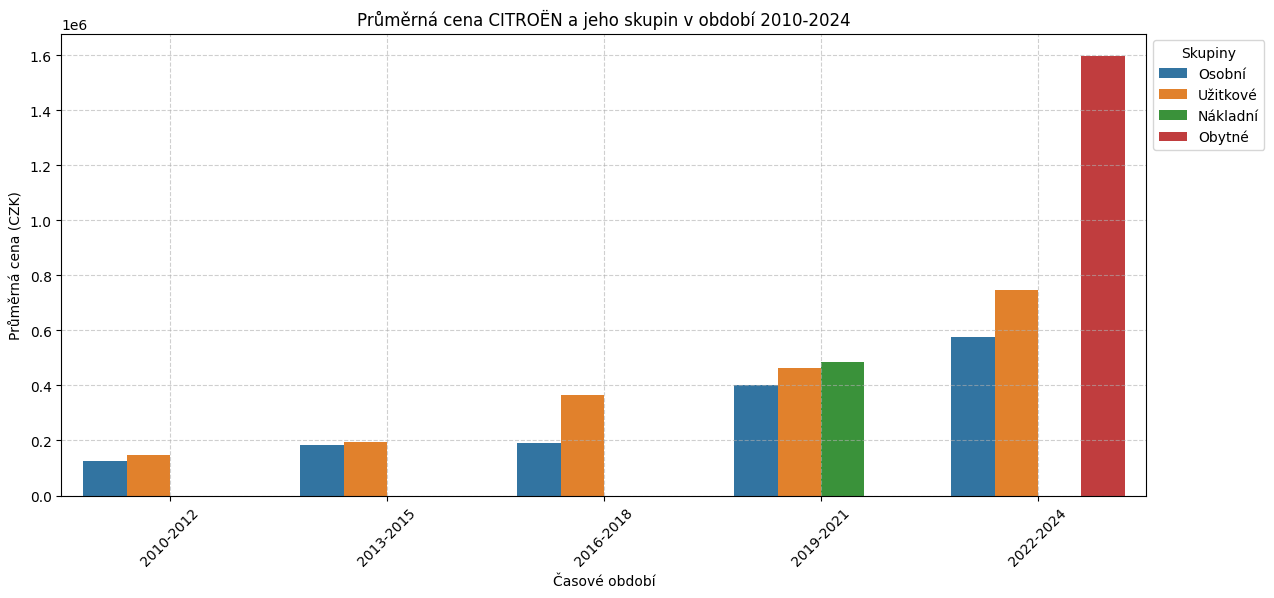

Žádná platná data pro značku AGADOS po filtraci.


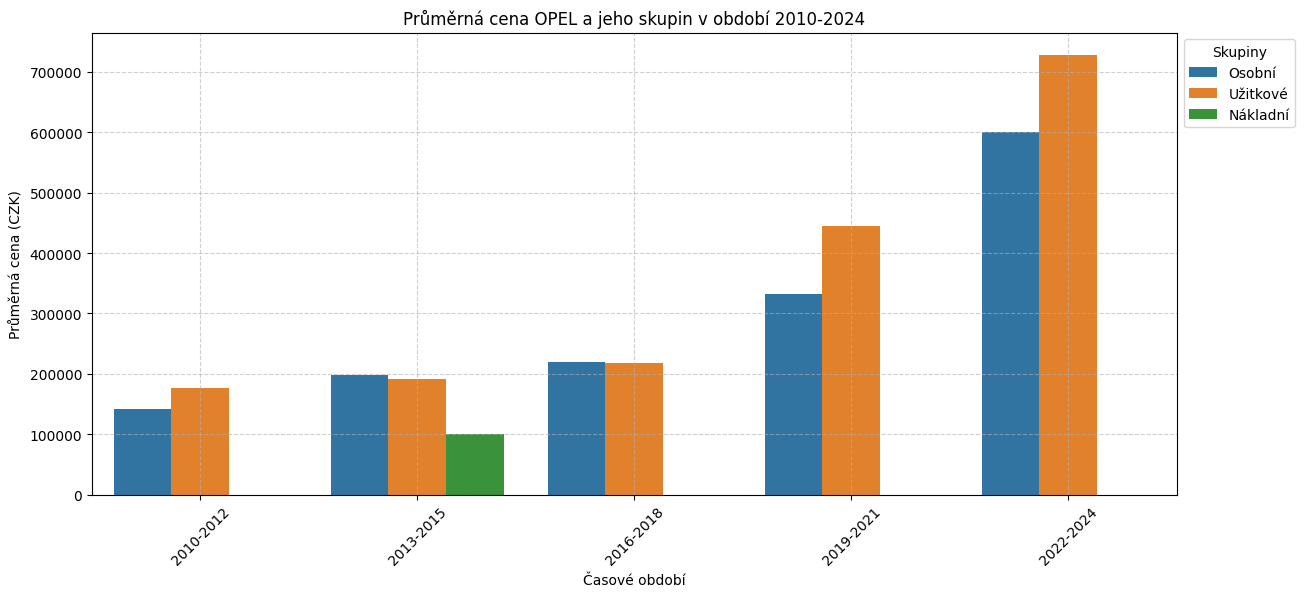

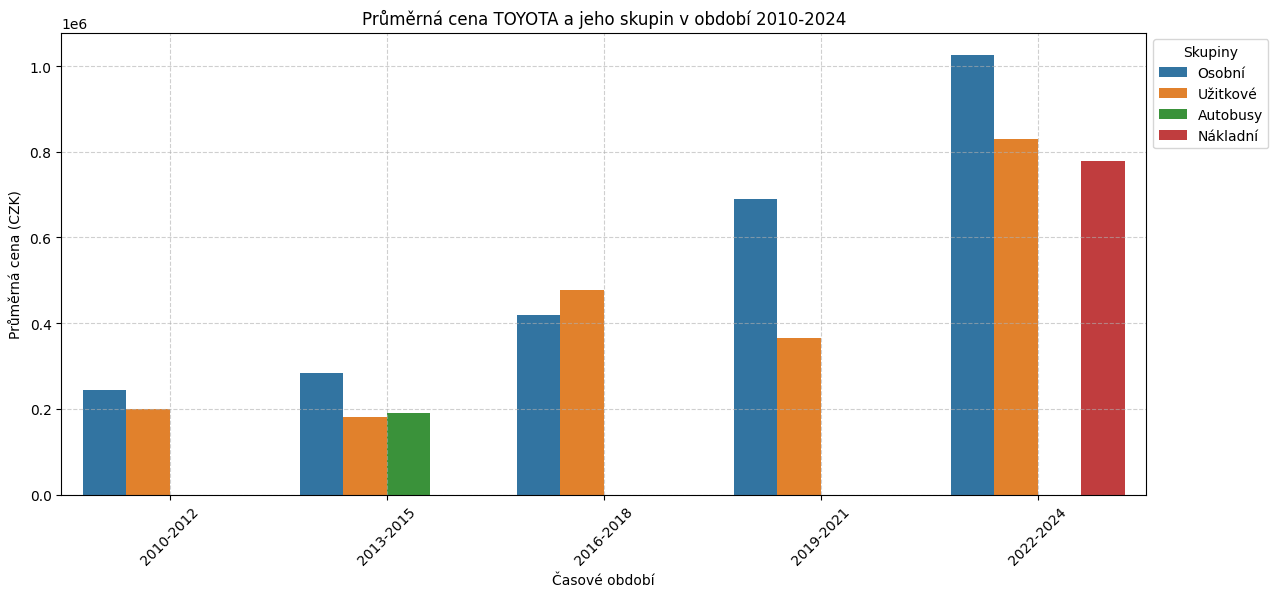

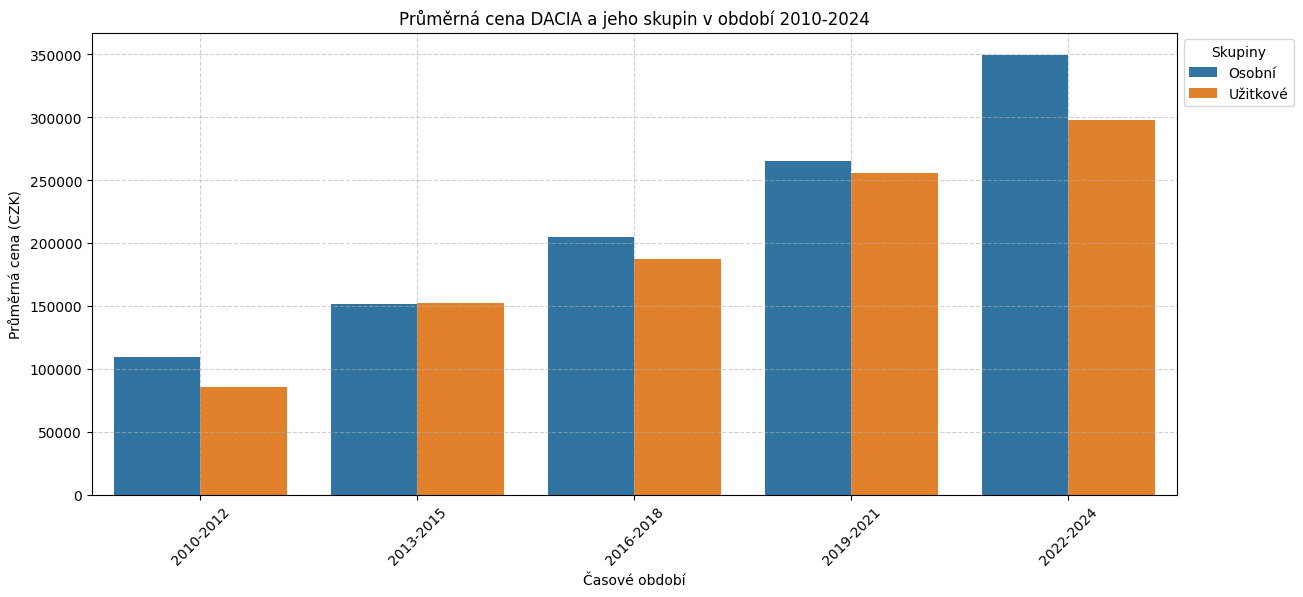

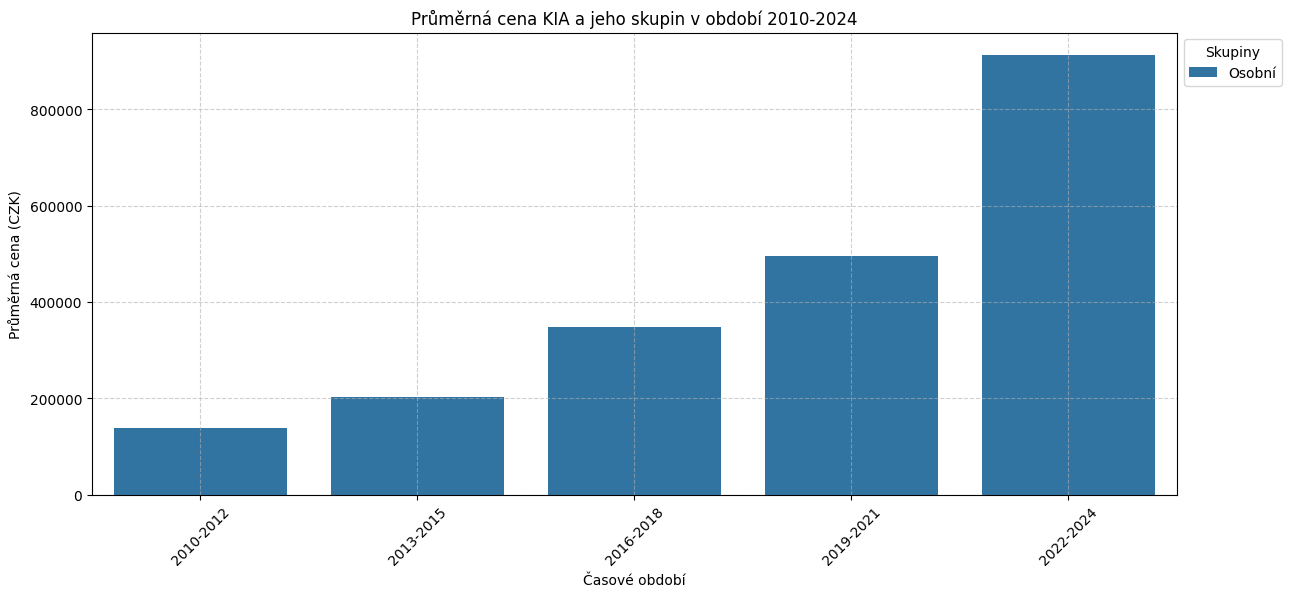

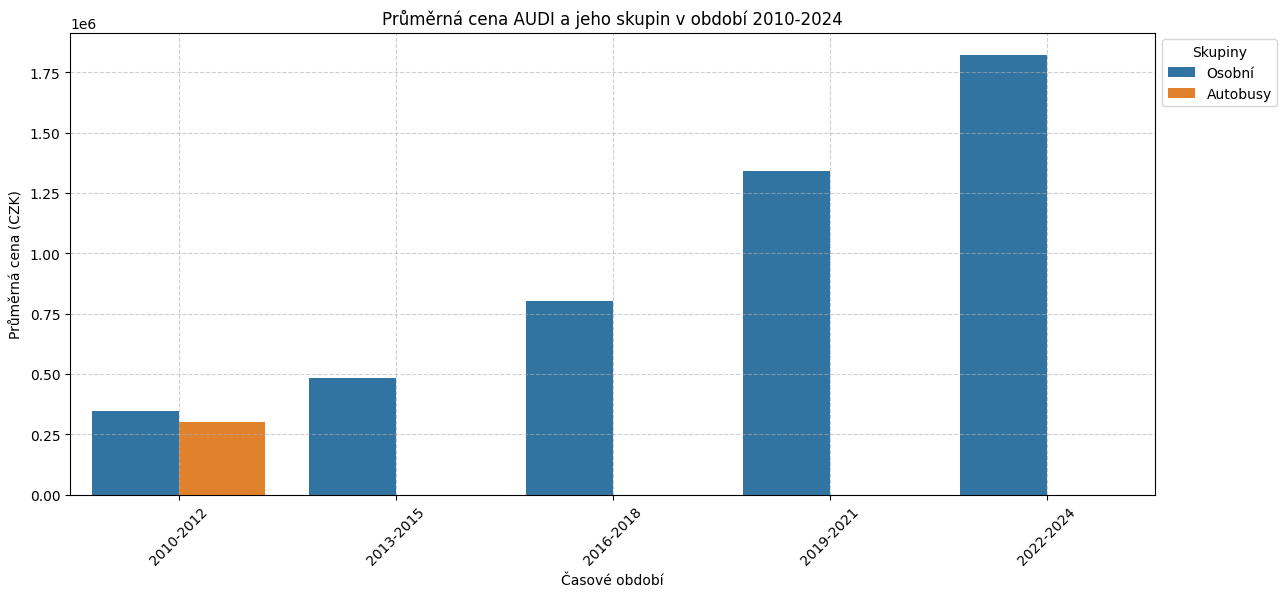

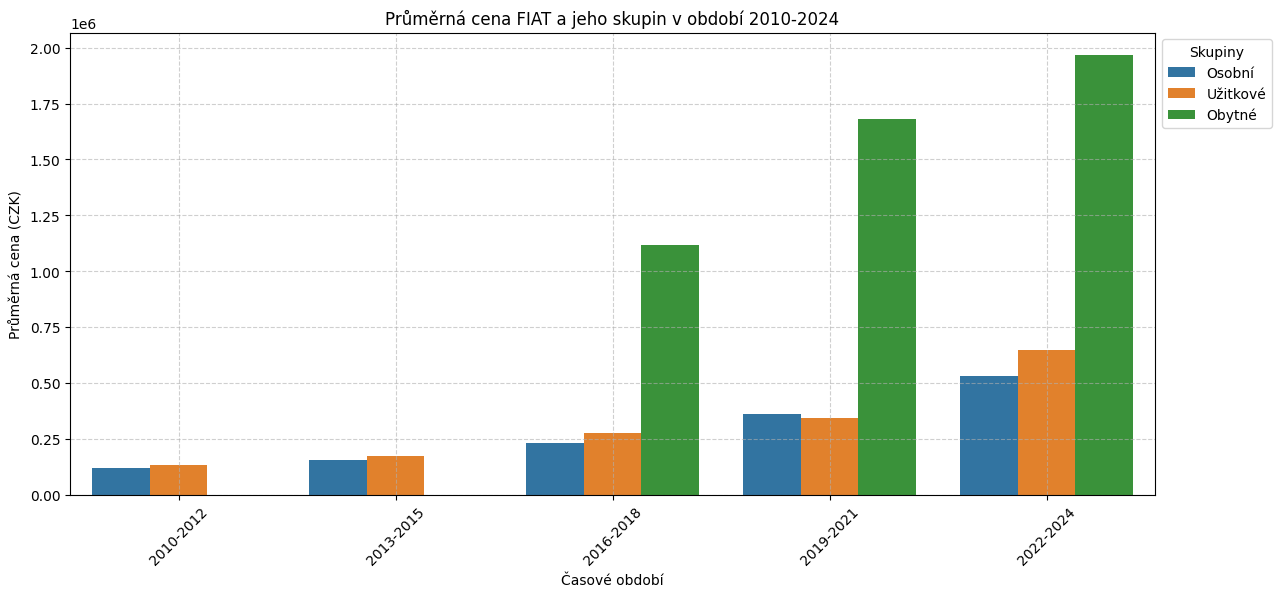

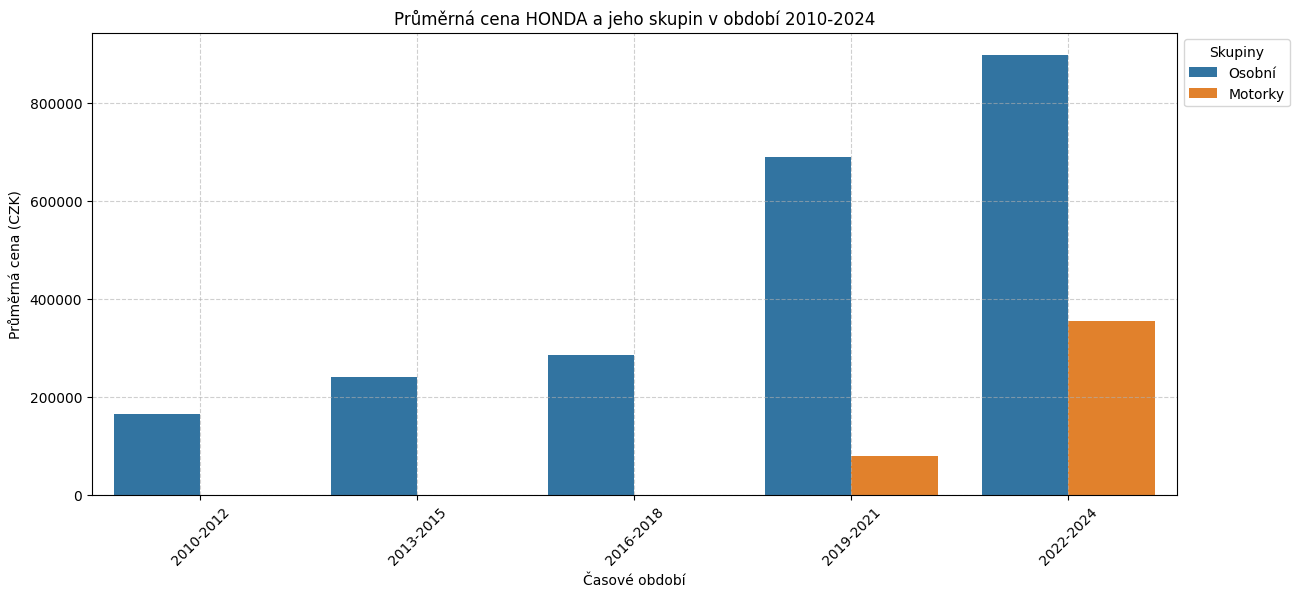

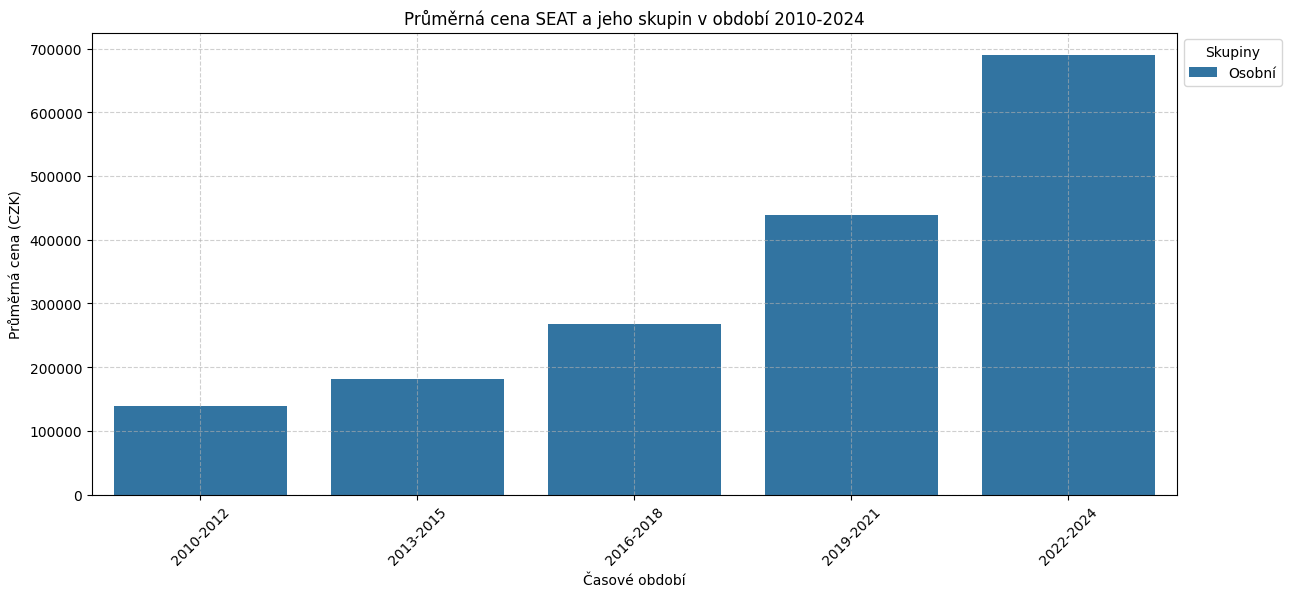

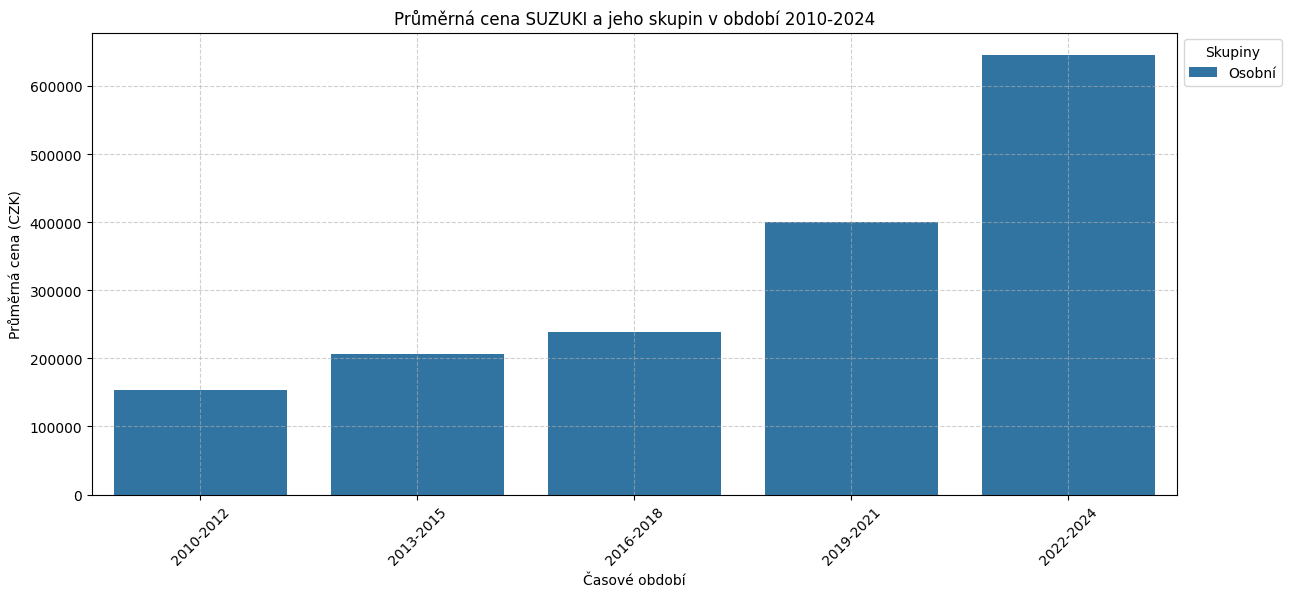

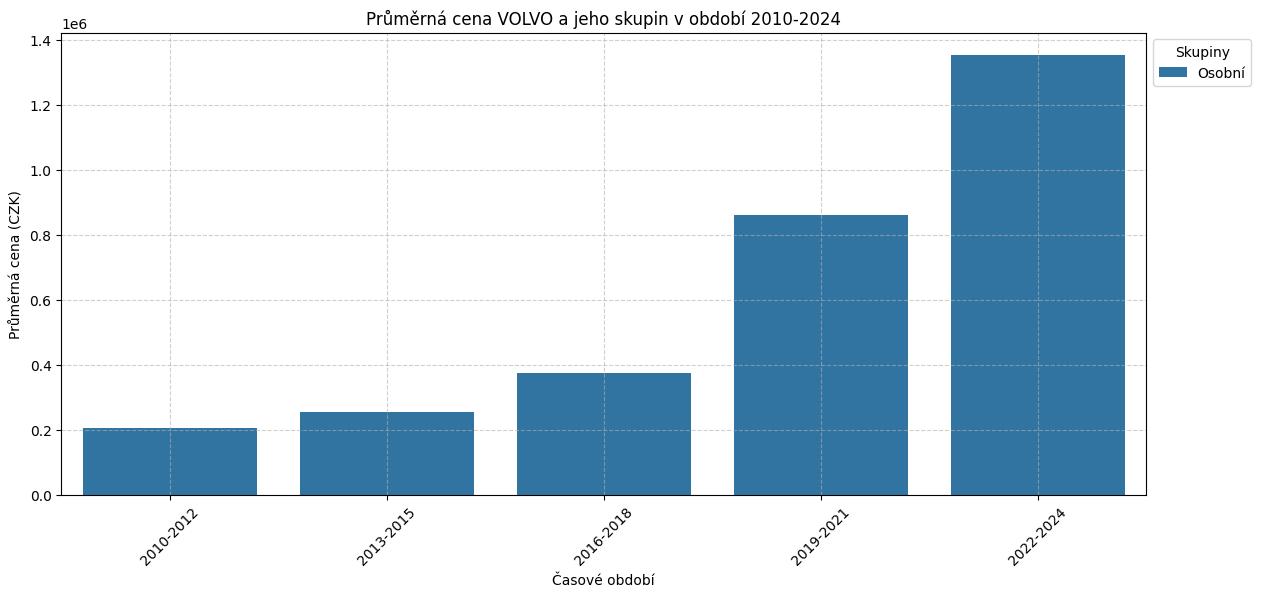

In [34]:
#"Průměrná cena značek a jejích skupin v období 2010 až 2024
import matplotlib.pyplot as plt
import seaborn as sns

period_order = ['2010-2012', '2013-2015', '2016-2018', '2019-2021', '2022-2024']

for brand in brands:
    try:
        brand_data = inzeraty[inzeraty['znacka'].str.upper() == brand.upper()]

        if brand_data.empty:
            print(f"Žádná data pro značku {brand}.")
            continue

        # Фільтрація небажаних моделей
        filtered_data = brand_data[~brand_data['nazev'].str.upper().isin([brand.upper(), "OSTATNÍ"])]

        if filtered_data.empty:
            print(f"Žádná platná data pro značku {brand} po filtraci.")
            continue

        count_data = filtered_data.groupby(
            ['vyroba_rok_skupina', 'znacka', 'nazev', 'skupina']
        ).agg(
            avg_cena=('list_cena_dph', 'mean')
        ).reset_index()

        plt.figure(figsize=(14, 6))
        sns.barplot(
            x='vyroba_rok_skupina',
            y='avg_cena',
            hue='skupina',
            data=count_data,
            palette='tab10',
            errorbar=None,
            order=period_order
        )

        plt.title(f"Průměrná cena {brand} a jeho skupin v období 2010-2024")
        plt.xlabel("Časové období")
        plt.ylabel("Průměrná cena (CZK)")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Skupiny")
        plt.savefig(f'Prumerna_cena_{brand}_skupina_čas_období_15.png', bbox_inches='tight', dpi=300)
        plt.show()

    except Exception as e:
        print(f"Chyba při zpracování značky {brand}: {e}")


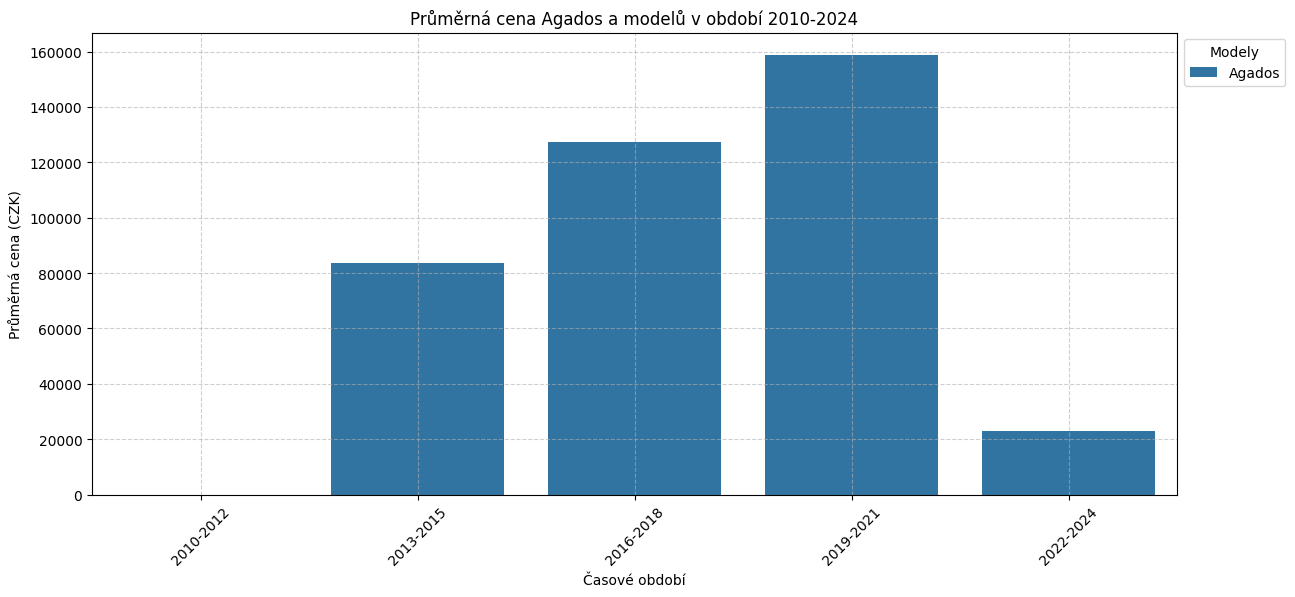

In [35]:
# Průměrná cena 'Agados' a modelů v období 2010-2024
# Definování časových období
period_order = ['2010-2012', '2013-2015', '2016-2018', '2019-2021', '2022-2024']

# Výběr dat pouze pro značku Agados
brand = 'Agados'
try:
    brand_data = inzeraty[inzeraty['znacka'].str.upper() == brand.upper()]

    if brand_data.empty:
        print(f"Žádná data pro značku {brand}.")
    else:
        count_data = brand_data.groupby(
            ['vyroba_rok_skupina', 'znacka', 'nazev', 'skupina']
        ).agg(
            avg_cena=('list_cena_dph', 'mean')
        ).reset_index()

        # Vytvoření grafu
        plt.figure(figsize=(14, 6))
        sns.barplot(
            x='vyroba_rok_skupina',
            y='avg_cena',
            hue='nazev',
            data=count_data,
            palette='tab10',
            errorbar=None,
            order=period_order
        )

        plt.title(f"Průměrná cena {brand} a modelů v období 2010-2024")
        plt.xlabel("Časové období")
        plt.ylabel("Průměrná cena (CZK)")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Modely')
        plt.savefig(f'Prumerna_cena_{brand}_model_čas_období.png', bbox_inches='tight', dpi=300)
        plt.show()

except Exception as e:
    print(f"Chyba při zpracování značky {brand}: {e}")


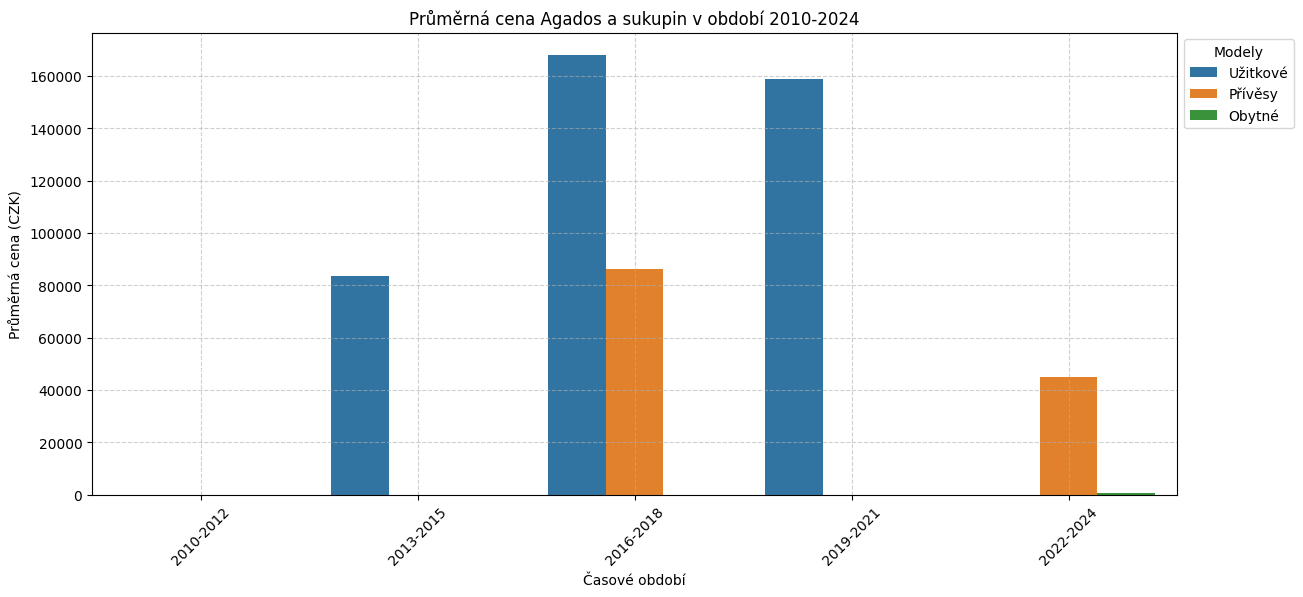

In [36]:
# Průměrná cena 'Agados' a skupin v období 2010-2024
# Definování časových období
period_order = ['2010-2012', '2013-2015', '2016-2018', '2019-2021', '2022-2024']

# Výběr dat pouze pro značku Agados
brand = 'Agados'
try:
    brand_data = inzeraty[inzeraty['znacka'].str.upper() == brand.upper()]

    if brand_data.empty:
        print(f"Žádná data pro značku {brand}.")
    else:
        count_data = brand_data.groupby(
            ['vyroba_rok_skupina', 'znacka', 'nazev', 'skupina']
        ).agg(
            avg_cena=('list_cena_dph', 'mean')
        ).reset_index()

        # Vytvoření grafu
        plt.figure(figsize=(14, 6))
        sns.barplot(
            x='vyroba_rok_skupina',
            y='avg_cena',
            hue='skupina',
            data=count_data,
            palette='tab10',
            errorbar=None,
            order=period_order
        )

        plt.title(f"Průměrná cena {brand} a sukupin v období 2010-2024")
        plt.xlabel("Časové období")
        plt.ylabel("Průměrná cena (CZK)")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Modely')
        plt.savefig(f'Prumerna_cena_{brand}_model_čas_období.png', bbox_inches='tight', dpi=300)
        plt.show()

except Exception as e:
    print(f"Chyba při zpracování značky {brand}: {e}")

In [37]:
agados_data_group = brand_data.groupby(['znacka','skupina']).size().reset_index(name='count')
print(agados_data_group)

   znacka   skupina  count
0  Agados    Obytné      1
1  Agados   Přívěsy      7
2  Agados  Užitkové      3


In [38]:
agados_data_model = brand_data.groupby(['znacka','nazev']).size().reset_index(name='count')
print(agados_data_model)

   znacka   nazev  count
0  Agados  Agados     11


#Ukládání výsledků do souborů ve formátu Excel

In [39]:
!pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.1 MB/s eta 0:00:00


In [40]:
all_15_dfs = {
    'all_col': inzeraty,
    'škoda_data': škoda_data,
    'ford_data': ford_data,
    'hyundai_data': hyundai_data,
    'peugeot_data': peugeot_data,
    'renault_data': renault_data,
    'citroën_data': citroën_data,
    'agados_data_model': agados_data_model,
    'agados_data_group': agados_data_group,
    'opel_data': opel_data,
    'toyota_data': toyota_data,
    'dacia_data': dacia_data,
    'kia_data': kia_data,
    'audi_data': audi_data,
    'fiat_data': fiat_data,
    'honda_data': honda_data,
    'seat_data': seat_data,
    'suzuki_data': suzuki_data,
    'volvo_data': volvo_data,
    'tachometr': grouped_tachometr,
    'engine_power': grouped_engine_power,
    'karoserie': grouped_karoserie,
    'prevodovka': grouped_prevodovka,
    'cena_autos': count_data_sorted,
    'count_data_15_year': count_15_data,
    'filtered_data': filtered_data,
    'count_data': count_data
}

with pd.ExcelWriter('auto_15_data.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in all_15_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
